<a href="https://www.kaggle.com/charliezimmerman/digital-learning-during-pandemic-contest-winner?scriptVersionId=87449728" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# I.	 Engagement With Digital Learning During the COVID-19 Pandemic: Introduction.

<font size=+1>Across the United States in 2020, due to the COVID-19 pandemic, K-12 schools closed and instruction moved to remote settings. In the words of one report, the pandemic  "wreaked  havoc  on  children’s  educational  experiences."  (Hamilton  et  al.  2020).

<font size=+1>This disruption most severely impacted students with less access to  digital devices and internet connectivity at home compared to their peers. Specifically, the "Homework Gap", or the greater struggle such students already experienced with online assignments, morphed into a full-blown education gap, whereby those same students had less access to education generally.

<font size=+1>The crisis was serious, severe, and widespread. According to surveys,  "Nationwide, just 9 percent of teachers reported that nearly all of  their  students  regularly  completed  distance  learning  activities, and most teachers reported that no more than half of  students  did  so" and "just under half of parents agreed that their children spent less time on schoolwork and learned less during the spring 2020 shutdown than  they  would  have  in  a  typical  session  of  in-person schooling."  (Hamilton  et  al.  2020).</font> 

<font size=+1>As might be expected, during this time, educational experts and researchers ramped up their focus on understanding the digital education gap and on identifying factors that influence and may address it. Using a variety of data sources, but especially data provided by the education technology company LearnPlatform, this report sets out to contribute to this effort.</font> 

<font size=+1>Engagement with learning, digital or otherwise, is a complex,  multi-faceted, and somewhat elusive concept -- according to the educational software company GoGuardian, when teachers and administrators are asked to define this term, the typical answer is along the lines of "I know it when I see it". (Aguilar, Sheldon, et. al. 2020). However, as explained in more detail in the next section, LearnPlatform has devised a method of operationally defining digital learning engagement within school districts, by quantifying page-load events for specific educational technology products in a given day.</font>  

<font size=+1>This report will examine the relationship between these measures and a number of factors, including changes in engagement over time; demographic markers, based on district information in the LearnPlatform data set; and state-specific data from a variety of sources, aggregating results from district- to  state-level. The report is divided into three parts:
</font> 
    
<font size=+1>1. Explanation of the LearnPlatform measures of digital engagement and the other data LearnPlatform provides.</font>
    
<font size=+1>2. A review of factors associated with digital engagement levels, including changes over time, demographic factors, geography, and spending levels; this review will be based primarily on district level data.</font>
    
<font size=+1>3. A review of state-level data to a) identify policies, specifically related to education, that may increase, or fail to increase, digital engagement, and b) the association between engagement and distal state factors, such as interventions intended to mitigate pandemic-caused health and economic insecurity as opposed to those specifically geared towards education. </font> 



    






In [1]:
import numpy as np 
import pandas as pd 
import glob
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import missingno as msno

In [2]:
import statistics as stats
import scipy
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import gc
import math
from IPython.display import HTML
pd.options.mode.chained_assignment = None

In [3]:
def df_as_html(df, Center=True):
        format_start='<center>' if Center==True else ''
        format_end='</center>' if Center==True else ''
        display(HTML(format_start + df.to_html(index=False) + format_end))

In [4]:
def filter_df(df, column, value_list, operator="equals", drop_na=True):
    if(operator=="equals"):
        df=df[df[column].isin(value_list)]
     
    if(operator=="not_equals"): 
         df=df[~df[column].isin(value_list)]
    if(drop_na==True):
        df.dropna(inplace=True)
    return df

In [5]:
def TopBottomDataFrame(df, Category, RankedOn, RankCutoff):
    df_cols=df[[Category, RankedOn]].groupby(Category)
    df_cols=df[[Category,RankedOn]].groupby([Category], as_index=False)[RankedOn].mean()
    df_cols.columns=[Category, RankedOn]
    df_best=df_cols.nlargest(RankCutoff, RankedOn)
    df_worst=df_cols.nsmallest(RankCutoff, RankedOn)
    best_list=list(df_best[Category].reset_index(drop=True))
    worst_list=list(df_worst[Category].reset_index(drop=True))
    df_best_2 = df[df[Category].isin(best_list)].reset_index(drop=True)
    df_best_2.dropna(inplace=True)
    #print(best_list)
    #print(worst_list)
    df_worst_2 = df[df[Category].isin(worst_list)].reset_index(drop=True)
    df_worst_2.dropna(inplace=True)

    df_list= [df_best_2,  df_worst_2]
    return(pd.concat(df_list))
    gar=gc.collect()


In [6]:
def twovar_line_plot(df, dimension_col, fact_col, title=None, show=True):  #start by examining all the data over time.
  
    df_for_plot = df[[dimension_col,fact_col]]\
        .groupby([dimension_col])[fact_col].mean()

    if(title==None):
        title=fact_col + " by " + dimension_cold 
    
    fig = px.line(df_for_plot,
              width=800, height=375)
         
    fig.update_layout(
                      title=(title).title(),
                      title_x=0.39,
                      template="plotly_white",
                      paper_bgcolor='#f5f7f8',
                      font = {'family': 'Serif', 'size': 16}
                     )
    if(show==True):
        fig.show() 
    else:
        gar=gc.collect()
        return fig
    
    gar=gc.collect()
#return to this an pretty up graph
               


In [7]:
def stratified_two_varline_plot(df, x_var, y_var, grouping_var, Title, aggregate_on="mean", facet_on=None,
                               plot_width=800, plot_height=375, Show=True):
        df_for_plot_pct = df[[x_var, y_var, grouping_var]]\
         .groupby([x_var, grouping_var], as_index=False).agg(agg_value=(y_var, aggregate_on))
        
        if(facet_on==None):
          
             fig = px.line(df_for_plot_pct,x=x_var, 
                    y="agg_value", 
                  color=grouping_var,
                width=plot_width, height=plot_height,
                        labels={
                     "agg_value": y_var
                                }
                          )
        
        else:
          
             fig = px.line(df_for_plot_pct,x=x_var, 
                  y="agg_value", 
                  color=grouping_var,facet_col=facet_on,
                  width=plot_width, height=plot_height,
                        labels={
                     "agg_value": y_var
                                }
                          )
        
        fig.update_layout(
                      title=(Title).title(),
                      title_x=0.50,
                      template="plotly_white",
                      paper_bgcolor='#f5f7f8',
                      font = {'family': 'Serif', 'size': 16}
                     )
     

        if(Show==True):
            fig.show()
        else:
            return fig
        gar=gc.collect()

In [8]:
def compare_before_mid_pandemic(measure='engagement_index', filter_on_field=None,\
                        filter_on_values=None, OnlyDistrictsInBothPeriods=True):
        week_of_list_early=['2020-04-06', '2020-04-20', '2020-04-27']
        week_of_list_mid=['2020-09-14', '2020-09-21', '2020-09-28']
        col_list=['district_id', measure, 'weekof']
        if(filter_on_field !=None):
            col_list=col_list + filter_on_field

        df_base=districts_engagement_data[col_list]
        df_before=filter_df(df_base, 'weekof', week_of_list_early)
        if(filter_on_field !=None and filter_on_values !=None): 
            df_before=filter_df(df_before, filter_on_field[0], filter_on_values, 'equals')   
      
         
        df_after=filter_df(df_base, 'weekof', week_of_list_mid)
        if(filter_on_field !=None and filter_on_values !=None): 
            df_after=filter_df(df_after, filter_on_field[0], filter_on_values, 'equals') 
        if(OnlyDistrictsInBothPeriods==True):
            before_district=df_before['district_id']
            after_district=df_after['district_id']
            df_before=filter_df(df_before, 'district_id', after_district)
            df_after=filter_df(df_after, 'district_id', before_district)
        df_before.dropna(inplace=True)
        df_after.dropna(inplace=True)
        return df_before, df_after

In [9]:
def display_value_counts(df, group, group_name=None, Normalize=False, Center=False):
    if(group_name==None):
        rename=False
        group_name=group
    else:
        rename=True
    
    df=df[group].value_counts(normalize=Normalize).to_frame()
    df['count'] = df[group]
    df[group_name] = df.index

    if(rename==True):
        cols = [group_name, 'count' ]
        df=df[cols]
   
    df.columns=[group_name, 'count']
    df.reset_index(drop=True,inplace=True)
    htmlStr = '<center>'  if Center==True else '' 
    htmlStr+=df.to_html(index=False) 
    htmlStr+= '</center>' if Center==True else ''
    display(HTML(htmlStr))

In [10]:
def GetPairwiseComps(df, GroupCol, MeanCol, alpha=0.05, include_alpha=False):
    pw_comps = pairwise_tukeyhsd(endog=df[MeanCol], groups=df[GroupCol], alpha=alpha)
    #print(pw_comps)
    pw_results=pd.DataFrame(data=pw_comps._results_table.data[1:], columns=pw_comps._results_table.data[0])
    pw_results=pw_results.loc[pw_results.reject == True]
    if(include_alpha==False):
       pw_results =pw_results[['group1', 'group2','meandiff']]
       pw_results.columns=[GroupCol + '1', GroupCol + '2', 'meandiff']   
    else:
       pw_results =pw_results[['group1', 'group2','meandiff', 'p-adj']]
       pw_results.columns=[GroupCol + '1', GroupCol + '2', 'meandiff', 'p']

    gc.collect()
    return pw_results

In [11]:
def ttest_result_as_html(list1, list2, col1, col2, t_test, alpha=.05):
    t_stat=[t_test[0]]
    p_value= ["{:.6f}".format(t_test[1]) + "*" if t_test[1]<=alpha else t_test[1]]
    mean_col1=[np.mean(list1)]
    mean_col2=[np.mean(list2)]
    t_test_results = pd.DataFrame({
                    col1 + ' Mean': mean_col1,
                    col2 + ' Mean': mean_col2,
                    't': t_stat,
                    'p':p_value
                   })
    df_as_html(t_test_results)

# II.	 The Learn Platform Dataset.

<font size=+1>Learn Platform provides data on school districts, online educational products, and digital education engagement in three files:</font>

<font size=+1><b>Product Data:</b> This includes product information including a unique identifier, the product name, the providing company, the sector of education targeted (e.g., PreK-12, HigherEd), and the product's primary essential function. Each primary essential function line item indicates a top-level category (LC, Learning & Curriculum; CM, Classroom Management; or  SDO, School & District Operations) and one or more subcategories such as Virtual Classroom, Digital Learning Platform, Learning Management System, etc.</font>

<font size=+1><b>District Data:</b> Characteristics of school districts, including:</font><br>
<ul>
<li><font size=+1>State</font>
<li><font size=+1>Locale (city, suburban, town, or rural)</font>
<li><font size=+1>Percentage of students identified as Black or Hispanic based on 2018-19 National Center for Education Statistics (NCES) data (one of five values: 0-20, 20-40, 40-60, 60-80, and 80-100)</font>
<li><font size=+1>Percentage of students  eligible for free or reduced-price lunch based on NCES data (one of five values, same as above)</font>
<li><font size=+1>The ratio of homes with high speed internet connection in the district</font>
<li><font size=+1>The per-pupil total expenditure (local and federal) from Edunomics Lab's National Education Resource Database on Schools.</font><sup>1</sup>
<br><br>
<font size=+1>Identifiable information about the school districts has been removed.</font>
<br>
<br>
<font size=+1><b>Engagement Data:</b> This contains one file for each district, with each file name representing a district id. Each line item in each file includes a date time stamp, a product id pointing to a line item in the product data, and the two measurements used to operationally define "engagement with digital learning:"
<ul>
<li><font size=+1><i>Pct Access:</i> Percentage of students in the district have at least one page-load event of a given product and on a given day. 
<li><font size=+1><i>Engagement Index:</i> Total page-load events per one thousand students of a given product and on a given day 

<br><br>
<font size=-1><sup>1</sup>The expenditure data are school-by-school; the expenditure of a given school district is represented by the median value</font> 


**Important Notes About the Data, Its Limitations, and How We Use It:**

<font size=+1>The structure of the LearnPlatform data  allows us to aggregate the district data on various characteristics such as locale, ethnic makeup,  economic class standing (as reflected by the proportion of students in free/reduced lunch program), etc. and review the relationship between these features and digital education engagement, as it is operationally defined.</font>

<font size=+1>However, both precautions taken by LearnPlatform to preserve district anonymity, as well as apparent limitations in the data sample will affect the interpretation of these relationships.</font>

<font size=+1>To increase anonymization, LearnPlatform used an open-source tool to transform some data and released some of the data with a range of where the actual value falls under (e.g., the percentage of Black/Hispanic or Free/Reduced Price Lunch students in the district, as noted above). Additionally, there are many missing data points, where data was suppressed to further decrease the risk of identification.</font>

<font size=+1>Additionally, a cursory review of any of the data points suggests it is not representative of the entire country. For example, the below shows the observations in the engagement data for each state, represented as a ratio of observation count to state population:</font>

In [12]:
products_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
districts_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,parse_dates= ['time'])
    district_id = filename.split("/")[4].split(".")[0]
    df["district_id"] = district_id
    li.append(df)
    
engagement_df = pd.concat(li)
#add week of to the engagement data.
engagement_df['weekof']=engagement_df['time'] - engagement_df.time.dt.weekday * timedelta(days=1)
#engagement_df['weekof']= engagement_df['weekof'].dt.date
engagement_df = engagement_df.reset_index(drop=True)
products_engagement_data = pd.merge(products_df, engagement_df, left_on='LP ID', right_on='lp_id')


engagement_df["district_id"] = engagement_df["district_id"].astype(str).astype(int)
districts_engagement_data = pd.merge(districts_df, engagement_df, left_on='district_id', right_on='district_id')

gar=gc.collect()

In [13]:
state_data=pd.DataFrame(districts_engagement_data.state.value_counts().reset_index())
state_data.columns=['State', 'Count']

state_pop_data=pd.read_csv("../input/covid-19-state-statistics-as-of-12062020/StateHealthStats.csv")
state_pop_data['State']=np.where(state_pop_data['State']=='District of Columbia', \
                                   'District Of Columbia', state_pop_data['State'])
state_pop_data=pd.merge(state_pop_data, state_data,on="State")
state_pop_data["Observation To Population Ratio"]=state_pop_data["Count"] \
   / state_pop_data["2020 Population"]

state_pop_data=state_pop_data.sort_values("Observation To Population Ratio")

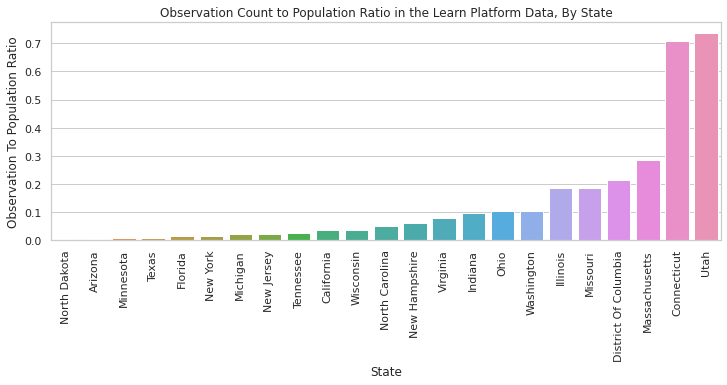

In [14]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(12,4))
barplot = sns.barplot(x="State", y="Observation To Population Ratio", data=state_pop_data, ax=ax)
ax.set_title('Observation Count to Population Ratio in the Learn Platform Data, By State')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90) 
plt.show()



<font size=+1>This is district rather than individual student data, but even without knowing the number of students in each district (besides the fact than less than half the states in the country are included), it's very clear that some states were sampled more thoroughly than others.</font>
    
<font size=+1>In the below analysis, we will adjust data based on these sampling issues. For example, in analyzing engagement over time, we will only include districts with at least one observation in the time period under investigation.  We note these adjustments prior to presenting our analysis in each case.</font>

<font size=+1>Some of the issues we want to study will introduce further limitations. For instance, we will review mean of the engagement measures by state in some of the analysis below, but because we don't know the number of students in each district, we cannot appropriately weight that mean based on student population.</font>

<font size=+1>For all of the above reasons, all conclusions based on the data below should be interpreted cautiously.  Rather than strive to arrive at definitive conclusions, our major purpose will be to identify findings and issues that might be worthy of further follow-up. At the same time, to mitigate these limitations, we will buttress our conclusions by 1) only reporting findings which are confirmed using both the engagement_index and pct_access measures of engagement, and 2) citing literature on online education engagement which lends support to our findings.</font>

# III.	 Factors Related to Digital Engagement During the Pandemic



## A.	 Time

<font size=+1>Engagement, as measured by the LearnPlatform data, changed over time in 2020, both from before the pandemic until after it began, and during the course of the pandemic, as the below time series charts demonstrate:</font>

In [15]:
#creating each dataset separately, so when dropna is invoked it does not lose values available on 
#on varaiable just because na on another 
weekof_engagement=districts_engagement_data[['engagement_index', 'weekof']]
weekof_engagement.dropna(inplace=True)
weekof_pctaccess=districts_engagement_data[['pct_access', 'weekof']]
weekof_pctaccess.dropna(inplace=True)

fig_eng=twovar_line_plot(weekof_engagement, "weekof", "engagement_index", "Mean Engagement Over Time, 2020", show=False)
fig_pa=twovar_line_plot(weekof_pctaccess, "weekof", "pct_access", "Mean Pct Access Over Time, 2020", show=False)
fig_eng.update_layout(xaxis_title="Time",
    yaxis_title="Mean Engagement Index",
    showlegend=False)
fig_pa.update_layout(xaxis_title="Time",
    yaxis_title="Mean Pct. Access",
    showlegend=False)
fig_eng.show()
fig_pa.show()
del(weekof_pctaccess)
gar=gc.collect()

In [16]:
df_combined_measures=districts_engagement_data[['district_id', 'pct_access', 'engagement_index']]
df_combined_measures.dropna(inplace=True)
corr = stats.pearsonr(df_combined_measures.pct_access, \
                 df_combined_measures.engagement_index)
#print(f'Correlation between the measures: {corr}')

<font size=+1>On both measures, we see surges in digital engagement in April and September.  These times align to the outset of the transition to remote learning in April, and the beginning of the school year in September. Following these surges, we see small drop-offs initially and larger drop-offs roughly aligned to school holidays or approaching school holidays (e.g., Summer, Thanksgiving, Winter Break).</font>

<font size=+1>On the Percent Access measure, higher levels are observed prior to the widespread adoption of remote learning. Percent access reflects the percentage of students in the district with at least one page load, whereas engagement index is a measure of total page loads. Thus, percent access is more sensitive to the degree to which <i>any</i> schoolwork was completed online before remote learning became the norm. Perhaps the drop-off in students going online at least once, beginning around the outset of pandemic disruptions,  reflects a decrease in overall educational engagement associated with the change to remote-only education, even as the total number of access events increased due to online being "the only game in town."</font>

<font size=+1>Other than this difference in pattern prior to widespread school closures, percent access and engagement index seem to follow a similar time trend. In fact, the correlation between the two measures, at 0.752, is highly significant, suggesting that to a significant degree, they both measure the same construct.</font>


***Changes over Time:  Measurement and Follow-up***


<font size=+1>Most likely, there are multiple reasons for the observed increases in digital education over the course of the pandemic.  For instance, students surely adapted better to the remote learning environment over time. However, various interventions on the part of educators and local and state policy makers no doubt contributed to improved engagement, especially between the second half of school year 2019-2020 and the first half of school year 2021.</font>

<font size=+1>To study this effect we defined a variable to permit comparison of engagement index and percent access scores across the two school terms.  These will be based on the values for three weeks in the respective school years, where, based on the above observations, it appears that engagement was relatively high and unaffected by extraneous factors such as upcoming or contemporaneous holidays: April 6, April 20, and April 27 for 2019-2020<sup>2</sup> and September 14, September 21, and September 28 for 2020-2021. The plot below illustrates that these are neighboring weeks<sup>3</sup> with the most online educational activity for the two school years, based on the engagement index measure.</font> 

<font size=+1>Note that subsequent analyses based on this variable will refer to the two time frames as <b>"early pandemic"</b> and  <b>"mid pandemic"</b> and will include only districts with at least one observation in the early period and at least one in the mid period.</font>

<font size=-1><sup>2</sup>The drop-off during the week of April 13th is assumed to be due to Spring Break.<br/>
<font size=-1><sup>3</sup>Though the mean value for 2020-12-14 is slightly higher than the value for 2020-09-14, we used the latter date for the mid-pandemic grouping to keep the dates nearby in time. 

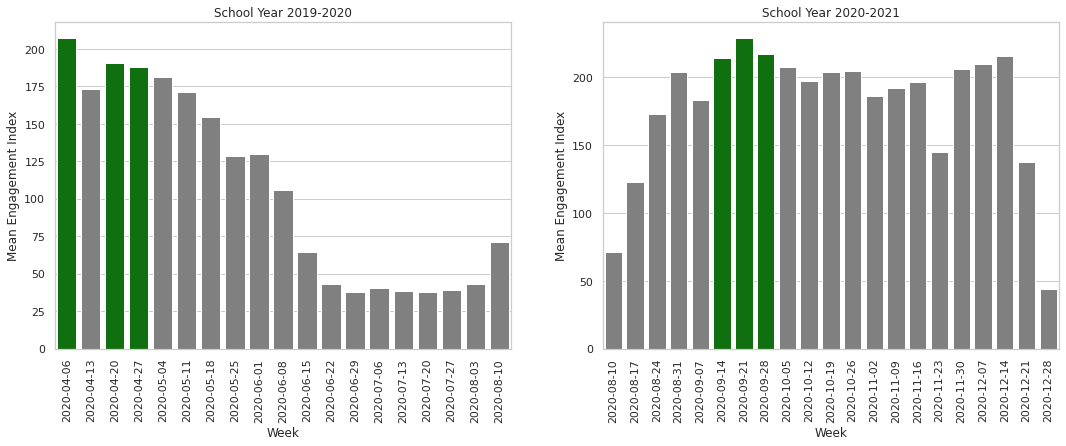

In [17]:
weekof_engagement_means=weekof_engagement.groupby('weekof', as_index=False)['engagement_index'].mean()

weekof_engagement_means1 =weekof_engagement_means[np.logical_and(weekof_engagement_means['weekof'] >= '2020-04-06',   \
            weekof_engagement_means['weekof']<='2020-08-10')]
weekof_engagement_means2 =weekof_engagement_means[(weekof_engagement_means['weekof'] >= '2020-08-10')]

dts1=weekof_engagement_means1['weekof'].dt.date.unique()
dts2=weekof_engagement_means2['weekof'].dt.date.unique()
week_of_list=[datetime.date(2020, 4, 6), datetime.date(2020, 4, 20),
       datetime.date(2020, 4, 27), datetime.date(2020, 9, 14), datetime.date(2020, 9, 21),
       datetime.date(2020, 9, 28)]

clrs1 = ['green' if x in week_of_list else 'grey' for x in dts1 ]
clrs2 = ['green' if x in week_of_list else 'grey' for x in dts2 ]
weekof_engagement_means1.columns=['Week', 'Mean Engagement Index']
weekof_engagement_means2.columns=['Week', 'Mean Engagement Index']


fig, [ax1, ax2] = plt.subplots(1,2,figsize=(18,6))
ax1.set_title('School Year 2019-2020')
ax2.set_title('School Year 2020-2021')
bp1=sns.barplot(data=weekof_engagement_means1,x="Week", y="Mean Engagement Index",palette=clrs1, ax=ax1)
bp2=sns.barplot(data=weekof_engagement_means2,x="Week", y="Mean Engagement Index",palette=clrs2, ax=ax2)
bp1.set_xticklabels(labels=dts1,rotation=90)
bp2.set_xticklabels(labels=dts2,rotation=90)

plt.show()

#del(weekof_engagement)
del(weekof_engagement_means1)
del(weekof_engagement_means2)

gar=gc.collect()




<font size=+1>The below statistical test results show that the early-pandemic and mid-pandemic means on both engagement measures differ significantly:</font>

In [18]:
alpha=.05
df_before, df_after=compare_before_mid_pandemic()
t_test=scipy.stats.ttest_ind(df_before.engagement_index, \
    df_after.engagement_index, alternative='less')

mean_me_before=np.mean(df_before.engagement_index)
mean_me_after=np.mean(df_after.engagement_index)
t_stat_me=t_test[0]
p_value_me= "{:.6f}".format(t_test[1]) + "*" if t_test[1]<=alpha else t_test[1]

df_before, df_after=compare_before_mid_pandemic(measure='pct_access')
t_test=scipy.stats.ttest_ind(df_before.pct_access, \
   df_after.pct_access, alternative='less')

mean_pa_before=np.mean(df_before.pct_access)
mean_pa_after=np.mean(df_after.pct_access)
t_stat_pa=t_test[0]
p_value_pa= "{:.6f}".format(t_test[1]) + "*" if t_test[1]<=alpha else t_test[1]

t_test_results = pd.DataFrame({'Measure':['Engagement Index', 'Pct Access'],
                    'Early Pandemic Mean': [mean_me_before, mean_pa_before],
                    'Mid pandemic Mean': [mean_me_after, mean_pa_after],
                    't': [t_stat_me, t_stat_pa],
                    'p':[p_value_me, p_value_pa]
                   })
df_as_html(t_test_results)
del(df_before)
del(df_after)
gar=gc.collect()



Measure,Early Pandemic Mean,Mid pandemic Mean,t,p
Engagement Index,194.786461,217.093305,-8.451990,0.000000*
Pct Access,0.523381,0.647780,-30.857896,0.000000*


**B. Connectivity/Device Access** 

<font size=+1>Common sense dictates that without an adequate device and reliable internet connectivity<sup>4</sup>, a student is essentially precluded from engagement in digital learning. And research has found that "student technological resources, such  as  high-speed  Internet  and  access  to  Internet-enabled  devices,  predict  engagement  even  after  controlling  for  student family income and other measures of household socio-economic resources." (Domina, Renzulli, et. al., 2021)</font>

<font size=+1>The LearnPlatform data contains one attribute related to connectivity, County Connections Ratio, or the ratio of household residential high-speed connections internet connections to total households in the district's county. However, based on the number of samples in each category provided, this data is not useful:</font>

<font size=-1><sup>4</sup>The Boston Consulting Group/Common Sense report defines "adequate device" as a desktop, laptop, or tablet, and adequate internet connection as 25/3 Mbps (download/upload speeds), at a minimum. (Chandra, Chang, et. al., (2020)).</font>

In [19]:
display_value_counts(districts_engagement_data,"county_connections_ratio", "Connection Ratio", Center=True)
gar=gc.collect()

Connection Ratio,count
"[0.18, 1[",16004420
"[1, 2[",1607



<font size=+1>Instead, we review the U.S. Census Bureau (2020) Household Pulse Survey, data collected between December 9th and December 21st. This survey covers many aspects of education during the pandemic, including household connectivity and device availability. Below we will bump the Learn Platform Engagement data against the survey data, at the state level, to get a general idea of how device and internet access relates to engagement in digital learning. Specifically we capture Spearman r correlations for states in the  Learn Platform dataset, ranked on mean engagement index and pct access, to the state rankings for each category in the survey:</font>

<font size=+1>The below lists the categories captured and their descriptions in the census survey data:</font>



In [20]:
df_availability=pd.read_csv("../input/device-internet-availability/DeviceInternetAvailable.csv")
cols=['state', 'total', 'Device_always', 'Device_usually', 'Device_sometimes',
     'Device_rarely', 'Device_never', 'Device_DNR','Internet_always', 'Internet_usually',
      'Internet_sometimes', 'Internet_rarely', 'Internet_never','Internet_DNR']
df_availability.columns=cols





| Category                  | Description                                                                                                                                                                                                                                                                              |
|------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Device_always          | Device always available for educational purposes     |
| Device_usually         | Device usually available for educational purposes     |
| Device_sometimes                 | Device sometimes available for educational purposes   |
| Device_rarely   | Device rarely available for educational purposes     |
| Device_never        | Device never available for educational purposes    |
| Device_DNR | Respondent did not reply to question about device availability. |
| Internet_always            | Internet always available for educational purposes. |
| Internet_usually            | Internet usually available for educational purposes |
| Internet_sometimes         | Internet sometimes available for educational purposes |
| Internet_rarely            | Internet rarely available for educational purposes   |
| Internet_never             | Internet never available for educational purposes   |
| Internet_DNR               | Respondent did not reply to question about Internet availability. |                         

In [21]:
#update the availability stats to percentages. 
totals=df_availability['total']
for  i in  range(len(df_availability)):
    for j in range(2, len(df_availability.columns)):
        #print(i,j)
        df_availability.iloc[i, j]=df_availability.iloc[i, j] / totals[i]

<font size=+1>Before turning to the correlations, we review the state mean engagement data, and exclude some states due to apparent sampling issues, based on the below list of states with the fewest observations in the LearnPlatform data:</font>

In [22]:
#compare to state mean engagement index in Learn Platform data
state_engagement_data=districts_engagement_data[['state', 'engagement_index']].dropna()
state_pa_data=districts_engagement_data[['state', 'pct_access']].dropna()
state_means_eng=state_engagement_data.groupby('state', as_index=False).mean('engagement_index')
state_means_eng.rename(columns={'engagement_index':'mean_engagement_index'}, inplace=True)
state_means_pa=state_pa_data.groupby('state', as_index=False).mean('pct_access')
state_means_pa.rename(columns={'pct_access':'mean_pct_access'}, inplace=True)
df=state_engagement_data['state'].value_counts().to_frame()
df['count'] = df['state']
df['state'] = df.index
df.columns=['state', 'count']
df_counts=pd.merge(df, state_means_eng, on='state')
df_counts=df_counts.sort_values('count')
df_as_html(df_counts.nsmallest(5, 'count'))
del(df_counts)
del(df)
gar=gc.collect()

state,count,mean_engagement_index
North Dakota,1607,423.002601
Minnesota,22189,160.833411
Arizona,23248,740.788101
New Hampshire,77315,328.008548
Tennessee,120042,72.697953


<font size=+1>The counts for North Dakota and Arizona are very low and the Engagement Index score is elevated; in combination, this suggests that the mean scores for these states may have been affected by inadequate sampling. Thus, their data is not included in this analysis, and subsequent analysis involving state mean engagement measure scores will also not include North Dakota and Arizona.</font>


<font size=+1>With these states excluded, below are the correlations between the ranked percentage of responses in each state within categories and state mean scores on the engagement index and pct access variables.</font>


In [23]:
state_means=pd.merge(state_means_pa, state_means_eng, on="state")
state_means=filter_df(state_means, 'state', ['North Dakota', 'Arizona'], 'not_equals')
df_engagement_availability =pd.merge(df_availability, state_means, on='state')
#del(df_availability)
df_engagement_availability.drop('total', axis=1,inplace=True)
#convert to ranks
states=df_engagement_availability.state
df_engagement_availability.drop('state', axis = 1, inplace=True)
df_engagement_availability=df_engagement_availability.rank(axis=0, ascending=False).astype(int)

gar=gc.collect()


In [24]:
#rank states on mean engagement and the survey categories
#check Spearman correlations and p values.
mean_engagement=df_engagement_availability['mean_engagement_index']
mean_pct_access=df_engagement_availability['mean_pct_access']
df_engagement_availability.drop(['mean_engagement_index'], axis=1, inplace=True)
df_engagement_availability.drop(['mean_pct_access'], axis=1, inplace=True)

In [25]:

corr_eng=[]
ps_eng=[]
corr_pa=[]
ps_pa=[]

#mean_engagement=df_engagement_availability_corr['mean_engagement']
for col in df_engagement_availability.columns:
    vals=df_engagement_availability[col]
    sr_eng=stats.spearmanr(vals, mean_engagement)
    sr_pa=stats.spearmanr(vals, mean_pct_access)
    #workaround to above version issue
    corr_eng.append(sr_eng[0])
    corr_pa.append(sr_pa[0])
    p_eng = sr_eng[1]/2 if col in ['Device_always', 'Internet_always','Device_rarely', 'Device_never','Internet_rarely', 'Internet_never']\
        else sr_eng[1] #for items in list there is a specific directionaly hypothesis about the relationship, so 
                            #one-tailed alpha is used
    p_pa = sr_pa[1]/2 if col in ['Device_always', 'Internet_always','Device_rarely', 'Device_never','Internet_rarely', 'Internet_never']\
        else sr_pa[1] #for items in list there is a specific directionaly hypothesis about the relationship, so 
                            #one-tailed alpha is used
    p_eng= "{:.6f}".format(p_eng) + "*" if p_eng<=.05 else p_eng
    p_pa= "{:.6f}".format(p_pa) + "*" if p_pa<=.05 else p_pa
    ps_eng.append(p_eng)
    ps_pa.append(p_pa)


In [26]:
engagement_avail_results = pd.DataFrame({'Variable':  df_engagement_availability.columns,
                   'Spearman r Enagement Index': corr_eng,
                    'Alpha Engagement': ps_eng,                    
                   'Spearman r Pct Access': corr_pa,
                    'Alpha Pct Access': ps_pa
                    
                   })
df_as_html(engagement_avail_results)
del(engagement_avail_results) 
gar=gc.collect()

Variable,Spearman r Enagement Index,Alpha Engagement,Spearman r Pct Access,Alpha Pct Access
Device_always,0.442105,0.029028*,0.314035,0.09521
Device_usually,-0.175439,0.472508,-0.035088,0.886603
Device_sometimes,-0.568421,0.011107*,-0.521053,0.022161*
Device_rarely,-0.559314,0.006391*,-0.513294,0.012299*
Device_never,-0.573474,0.005128*,-0.499135,0.014792*
Device_DNR,-0.180702,0.459109,-0.078947,0.748011
Internet_always,0.701754,0.000406*,0.678947,0.000696*
Internet_usually,-0.347368,0.145066,-0.324561,0.175186
Internet_sometimes,-0.540351,0.016919*,-0.473684,0.040494*
Internet_rarely,-0.298681,0.107094,-0.285465,0.11807


<center><b>Observations on the Relationship between Connectivity/Device Access and Engagement</b></center>

<font size=+1>These correlational results, while not straightforward to interpret, support the intuitive assumption that without an adequate device or Internet connectivity, there can be no engagement in digital learning.</font> 

<font size=+1>On all the dimensions, except for Usually Available and Did Not Reply on the device question, the correlations' magnitudes approached or reached significance.</font>

<font size=+1>For the device questions, the rankings on Sometimes, Rarely, and Never Available were significantly negatively correlated with the rankings on both measures of engagement, and the ranking on Always Available was significantly and positively correlated with engagement index ranking. For the Internet questions, we see the same correlation directions, and significance on the Always and Sometimes rankings as well as on the Did Not Reply response.</font>
    
<font size=+1>These data clearly suggest that connectivity and device access are pre-requisites to engagement with digital learning, and they provide fodder for speculation. On "Sometimes Available", both for Internet and Device availability, we see high correlations with both engagement measures. For this population, perhaps the hassle of obtaining access to these resources is draining, demotivating, and strongly decreases engagement? For devices, we see a significantly negative correlation on the Never Available<sup>5</sup> response but not for Did Not Reply; for Internet that pattern is reversed. Maybe many respondents with no available device did not reply to the Internet question?</font>
    

<sup>5</sup>For both Did Not Reply and Sometimes Available, we did not hypothesize the direction of the relationship, so the significant results are based on a two-tailed test, meaning that they had to be higher in magnitude to attain significance, compared to cases where we did use a directional hypothesis (i.e., the always, rarely, and never questions). 

**C. Race and Economic Status:**

<font size=+1>Many researchers and experts have found that COVID-19 has had a disparate impact on the educational outcomes of students of color, compared to Caucasian students, and on economically disadvantaged students, compared to their more affluent peers.<font>

<font size=+1>For example, a U.S Department of Education Office of Civil Rights (2021) Report states that "According to one survey, as of summer 2020, nearly a third of teachers in majority Black schools reported that their students lacked the technology necessary to take part in virtual instruction. Only one in five teachers said the same in schools where fewer than 10% of students were Black." And research by the McKinsey company suggests that students in school year 2020 "could expect to lose anywhere from one-third to half of their academic gains from last year compared to typical progress—with large racial and class disparities." (Dorn, Hancock, et. al. 2020).

<font size=+1>Per the below time-series charts, the LearnPlatform data clearly shows engagement gaps, to the detriment of districts with higher percentages of students identifying as Black/Hispanic and students eligible for free or-reduced price lunch, except for districts in the 80-100% range on both dimensions.<sup>6</sup></font>
   
<sup>6</sup><font size=-1>The patterns are similar for both engagement index and pct_access, so we only chart the former; to view the pct_access chart, the commented code can be uncommented and run</font>
  


In [27]:
weekof_engagement_race=districts_engagement_data[['engagement_index', 'weekof','pct_black/hispanic']]
weekof_engagement_race.dropna(inplace=True)
fig=stratified_two_varline_plot(weekof_engagement_race, "weekof", "engagement_index",'pct_black/hispanic', \
        "Mean Engagement Index over Time By Pct Black/Hispanic student identification", Show=False)
fig.update_layout(xaxis_title="",
    yaxis_title="Mean Engagement Index")
fig.show()
weekof_pctaccess_race=districts_engagement_data[['pct_access', 'weekof','pct_black/hispanic']]
weekof_pctaccess_race.dropna(inplace=True)
#stratified_two_varline_plot(weekof_pctaccess_race, 'weekof','pct_access','pct_black/hispanic', 'Mean Pct Access over Time By Pct Black/Hispanic student identification')

weekof_engagement_class=districts_engagement_data[['engagement_index', 'weekof','pct_free/reduced']]
weekof_engagement_class.dropna(inplace=True)
fig=stratified_two_varline_plot(weekof_engagement_class, "weekof", "engagement_index",'pct_free/reduced',\
                            "Mean Engagement Index over Time By Pct Free/Reduced Price Lunch Eligibility", \
                            Show=False)
fig.update_layout(xaxis_title="",
    yaxis_title="Mean Engagement Index")
fig.show()
weekof_pctaccess_class=districts_engagement_data[['pct_access', 'weekof','pct_free/reduced']]
weekof_pctaccess_class.dropna(inplace=True)
#stratified_two_varline_plot(weekof_pctaccess_class, 'weekof','pct_access','pct_free/reduced', 'Mean Pct Access over Time By Pct Free/Reduced Lunch Students')

del(weekof_pctaccess_race)
del(weekof_pctaccess_class)

gar=gc.collect()


<font size=+1>Based on the research cited above as well is what is widely-known regarding the historical and current barriers people of color and the economically disadvantaged face, we don't believe that students in districts with 80% or greater Black/Hispanic or free/reduced price lunch eligible populations would on the average be more engaged with digital education nationwide. As shown below, these groups contain few districts and a skewed distribution of data, with extreme high values distorting the means. For these reasons, we will exclude both 80-100% groups from any analysis that focuses on specifically on ethnicity and economic status.</font>

In [28]:
engagement_race=districts_engagement_data[['district_id', 'pct_black/hispanic', 'engagement_index']]
engagement_race=filter_df(engagement_race, 'pct_black/hispanic', ['[0.8, 1['])
engagement_race.dropna(inplace=True)
#len(engagement_race.district_id.unique())
df_race=engagement_race.groupby('district_id', as_index=False)['engagement_index'].mean().sort_values('engagement_index')
display(HTML('<center><b>Mean Engagement Index, districts 80-100% Black/Hispanic</b></center>'))
df_as_html(df_race)
engagement_class=districts_engagement_data[['district_id', 'pct_free/reduced', 'engagement_index']]
engagement_class=filter_df(engagement_class, 'pct_free/reduced', ['[0.8, 1['])
engagement_class.dropna(inplace=True)
df_class=engagement_class.groupby('district_id', as_index=False)['engagement_index'].mean().sort_values('engagement_index')
display(HTML('<center><b>Mean Engagement Index, districts 80-100% Free-Reduced Lunch Eligible</b></center>'))
df_as_html(df_class)

district_id,engagement_index
2870,64.570940
5479,121.557694
9043,127.064110
4550,150.458222
7964,182.322547
4808,570.731126
9007,740.788101
9536,1311.816298


district_id,engagement_index
5042,103.941692
9043,127.064110
4808,570.731126
9536,1311.816298


<center><b>Do Vulnerable Groups Show the Same Increase<br/> in Engagement Over Time as the General Student Population?</b></center>

<font size=+1>According to a report by the U.S. Department of Education, Office of Civil Rights (2021), "COVID-19 has deepened widespread inequalities in access and opportunity facing many students of color in public schools," and the positive impacts of state interventions to improve access to and  engagement with digital learning did not accrue equally to students of color. Below we review what the Learn Platform data suggests regarding this issue, by reviewing means scores in the school districts of interest with the highest percentages of Black/Hispanic  and Free/Reduced Eligible students.</font>

In [29]:

ts=[]
ps=[]
means_early=[]
means_mid=[]
weekof_engagement_race=filter_df(weekof_engagement_race, 'pct_black/hispanic', ['[0.8, 1['], 'not_equals')


proportion_list=['[0.4, 0.6[', '[0.6, 0.8[']

for measure in ['engagement_index', 'pct_access']:
    df_before, df_after=compare_before_mid_pandemic(filter_on_field=['pct_black/hispanic'],\
               measure=measure, filter_on_values=proportion_list)
    for race_group in proportion_list:
        df_before_filter=filter_df(df_before, 'pct_black/hispanic', [race_group])
        df_after_filter=filter_df(df_after,'pct_black/hispanic', [race_group])
        means_early.append(np.mean(df_before_filter[measure]))
        means_mid.append(np.mean(df_after_filter[measure]))
        t_test=scipy.stats.ttest_ind(df_before_filter[measure], \
              df_after_filter[measure], alternative='less')
        ts.append(t_test[0])
        ps.append("{:.6f}".format(t_test[1]) + "*" if t_test[1]<=alpha else t_test[1])

    #ttest_result_as_html(df_before_filter.engagement_index, df_after_filter.engagement_index, 'Engagement Early Pandemic',\
       #             'Engagement Mid Pandemic', t_test)
    
    

    
  

In [30]:
for measure in ['engagement_index', 'pct_access']:
    df_before, df_after=compare_before_mid_pandemic(filter_on_field=['pct_free/reduced'],\
               measure=measure, filter_on_values=proportion_list)
    for race_group in proportion_list:
        df_before_filter=filter_df(df_before, 'pct_free/reduced', [race_group])
        df_after_filter=filter_df(df_after,'pct_free/reduced', [race_group])
        means_early.append(np.mean(df_before_filter[measure]))
        means_mid.append(np.mean(df_after_filter[measure]))
        t_test=scipy.stats.ttest_ind(df_before_filter[measure], \
              df_after_filter[measure], alternative='less')
        ts.append(t_test[0])
        ps.append("{:.6f}".format(t_test[1]) + "*" if t_test[1]<=alpha else t_test[1])

In [31]:
t_test_results = pd.DataFrame({'Grouping':list(np.repeat('Pct Black/Hispanic', 4))  + list(np.repeat('Pct Free/Reduced', 4)),
                    'Group': proportion_list *4,
                    'Measure':(list(np.repeat('Engagement Index', 2)) + list(np.repeat('Pct Access', 2))) * 2,
                    'Early Pandemic Mean': means_early,
                    'Mid pandemic Mean': means_mid,
                    't': ts,
                    'p':ps
                   })
df_as_html(t_test_results)  

Grouping,Group,Measure,Early Pandemic Mean,Mid pandemic Mean,t,p
Pct Black/Hispanic,"[0.4, 0.6[",Engagement Index,101.070310,150.098450,-7.559054,0.000000*
Pct Black/Hispanic,"[0.6, 0.8[",Engagement Index,134.308651,131.944072,0.283302,0.611527
Pct Black/Hispanic,"[0.4, 0.6[",Pct Access,0.279891,0.424159,-12.960132,0.000000*
Pct Black/Hispanic,"[0.6, 0.8[",Pct Access,0.369633,0.458209,-6.235121,0.000000*
Pct Free/Reduced,"[0.4, 0.6[",Engagement Index,172.682049,204.532387,-5.765448,0.000000*
Pct Free/Reduced,"[0.6, 0.8[",Engagement Index,95.928635,125.275309,-4.394738,0.000006*
Pct Free/Reduced,"[0.4, 0.6[",Pct Access,0.479919,0.602107,-13.308886,0.000000*
Pct Free/Reduced,"[0.6, 0.8[",Pct Access,0.280690,0.428121,-12.301466,0.000000*


<font size =+1>The results are mixed; for the 60-80% Black/Hispanic group,  on the engagement index variable, the means for the pre- and mid-pandemic periods are statistically equal. For all other comparisons, the groups showed increases in engagement over time, in line with the trend for all students.</font>

<font size =+1>It's possible that the different trends for the 60-80% Black/Hispanic group on engagement index vs. percent access have something to do with the difference in how these measures are calculated. As noted earlier, engagement index is a measure of total engagements for a product within a district, whereas pct. access measures the proportion of times at least one page load for a product occurred. Nonetheless, we'd conclude that the LearnPlatform data only provides limited support at best for the notion that students of color did not display the same improvements over time during 2020 in engagement as other students.</font>

**D. Locale:**

<font size=+1>Many experts and researchers have noted that students living in rural areas are vulnerable to educational disparities due to connectivity and device access issues. For instance, according to Chandra, et. al. (2020), "The digital divide is a major problem for students in all 50 states and all types of communities but is most pronounced in rural communities and households with Black, Latinx, and Native American students." And per Lake and Makori (2020), it is "painfully clear is that a disproportionate share of those who lack access to a reliable internet connection and devices are Black, Hispanic, live in rural areas, or come from low-income households."</font>

<font size=+1>However, in the  LearnPlatform data, rural districts actually score highest on the engagement measures compared to districts in cities, towns, and suburbs:</font>

In [32]:
weekof_engagement_locale=districts_engagement_data[['engagement_index', 'weekof','locale']]
weekof_engagement_locale.dropna(inplace=True)
fig=stratified_two_varline_plot(weekof_engagement_locale, "weekof", "engagement_index","locale",\
"Mean Engagement Index over Time By Locale", Show=False)
fig.update_layout(xaxis_title="",
    yaxis_title="Mean Engagement Index")
fig.show()
weekof_pctaccess_locale=districts_engagement_data[['pct_access', 'weekof','locale']]
weekof_pctaccess_locale.dropna(inplace=True)
fig=stratified_two_varline_plot(weekof_pctaccess_locale, 'weekof','pct_access','locale', \
                            'Pct Access By Locale Over Time', Show=False)

fig.update_layout(xaxis_title="",
    yaxis_title="Mean Pct Access")
fig.show()
del(weekof_engagement_locale)
del(weekof_pctaccess_locale)
gar = gc.collect()


<font size=+1>The plots below provide possible insight as to why the data here do not support the findings of others with respect to rural students. The LearnPlatform data contains a lower proportion of the more vulnerable groups in the rural locale, relative to the entire dataset. This is especially true with regard to the percent black/hispanic group--the rural districts are almost exclusively 0-20% black/hispanic, and none are above 60%.</font>


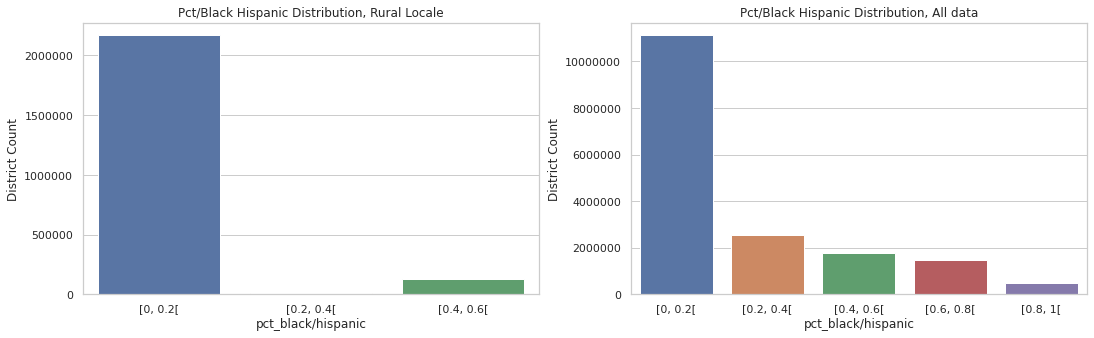

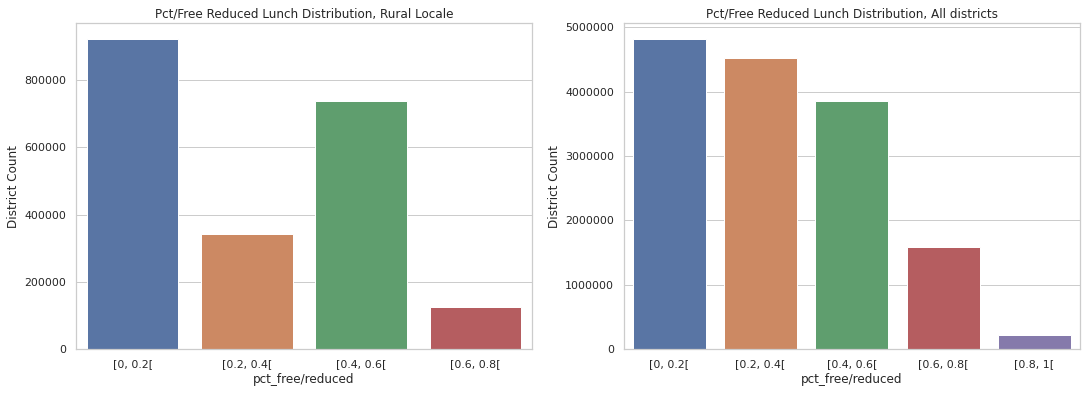

In [33]:
rural_race=districts_engagement_data[['locale', 'pct_black/hispanic']]
rural_race=filter_df(rural_race, 'locale',['Rural'])
rural_race.dropna(inplace=True)
all_race=districts_engagement_data[['pct_black/hispanic']]
all_race.dropna(inplace=True)
                  
rural_race_counts=rural_race.groupby('pct_black/hispanic', as_index=False).size()
all_race_counts=all_race.groupby('pct_black/hispanic', as_index=False).size()
all_race_counts.columns=['pct_black/hispanic', 'District Count']
rural_race_counts.columns=['pct_black/hispanic', 'District Count']

rural_class=districts_engagement_data[['locale', 'pct_free/reduced']]
rural_class=filter_df(rural_class, 'locale',['Rural'])
rural_class.dropna(inplace=True)
all_class=districts_engagement_data[['pct_free/reduced']]
all_class.dropna(inplace=True)

                  
rural_class_counts=rural_class.groupby('pct_free/reduced', as_index=False).size()
all_class_counts=all_class.groupby('pct_free/reduced', as_index=False).size()
all_class_counts.columns=['pct_free/reduced', 'District Count']
rural_class_counts.columns=['pct_free/reduced', 'District Count']

fig, [ax1, ax2] = plt.subplots(1,2,figsize=(18,5))
ax1.set_title('Pct/Black Hispanic Distribution, Rural Locale')
ax2.set_title('Pct/Black Hispanic Distribution, All data')
bp1=sns.barplot(data=rural_race_counts,x="pct_black/hispanic", y="District Count", ax=ax1)
bp2=sns.barplot(data=all_race_counts,x="pct_black/hispanic", y="District Count", ax=ax2)
bp1.ticklabel_format(style='plain', axis='y')
bp2.ticklabel_format(style='plain', axis='y')
plt.show()

fig, [ax3, ax4] = plt.subplots(1,2,figsize=(18,6))
bp3=sns.barplot(data=rural_class_counts,x="pct_free/reduced", y="District Count", ax=ax3)
bp4=sns.barplot(data=all_class_counts,x="pct_free/reduced", y="District Count", ax=ax4)
bp3.ticklabel_format(style='plain', axis='y')
bp4.ticklabel_format(style='plain', axis='y')
ax3.set_title('Pct/Free Reduced Lunch Distribution, Rural Locale')
ax4.set_title('Pct/Free Reduced Lunch Distribution, All districts')
plt.show()
del(rural_race)
del(rural_race_counts)
del(rural_class)
del(rural_class_counts)
del(all_race)
del(all_race_counts)
del(all_class)
del(all_class_counts)
gar=gc.collect()

   
<font size=+1>These distributions could be a function of the sampling bias in the LearnPlatform data or the specific way engagement is defined in the LearnPlatform data (i.e., most likely, other authors cited did not use page views on digital educational platforms to operationally define device access and connectivity). On the other hand, it could be true that ethnicity and economic class are more important drivers of the digital divide than geography, and it is less of a problem in predominately white or affluent rural areas.</font> 

<font size=+1>Resolution of this question is beyond the scope of this work, and we do not think the LearnPlatform data contradicts the established fact that connectivity and engagement gaps are very real in rural communities, but perhaps there are other variables that mediate this effect.</font>

**E. Per-Pupil Expenditures:**

<font size=+1>The Learn Platform data includes data on district per-pupil expenditures, and as might be expected, that data shows a clear relationship between spending and digital engagement:</font>







In [34]:
weekof_engagement_spending=districts_engagement_data[['engagement_index', 'weekof','pp_total_raw']]
weekof_engagement_spending.dropna(inplace=True)
fig=stratified_two_varline_plot(weekof_engagement_spending, "weekof", "engagement_index",\
                                "pp_total_raw", "Mean Engagement Index over Time By Per Pupil Expenditure",\
                                plot_height=450,Show=False)
fig.update_layout(xaxis_title="",
    yaxis_title="Mean Engagement Index",
    legend_title="Per Pupil Expenditure")

fig.show()
weekof_access_spending=districts_engagement_data[['pct_access', 'weekof','pp_total_raw']]
weekof_access_spending.dropna(inplace=True)
fig=stratified_two_varline_plot(weekof_access_spending, "weekof", "pct_access","pp_total_raw", \
                                "Mean Pct Access over Time By Per Pupil Expenditure",  plot_height=450,\
                                Show=False)
fig.update_layout(xaxis_title="",
    yaxis_title="Mean Engagement Index",
    legend_title="Per Pupil Expenditure")

fig.show()
del(weekof_access_spending)

<font size=+1>Because of the large number of these groups and unequal sample sizes within them, we have grouped them into three categories, shown below, along with the each group's observation count for the entire dataset:</font>

In [35]:
def classify_spending_group(x):
    low_spending_group=['[4000, 6000[', '[6000, 8000[', '[8000, 10000[']
    middle_spending_group=['[10000, 12000[','[12000, 14000[', '[14000, 16000[']
    if(x in(low_spending_group)):
        return 1
    elif(x in(middle_spending_group)):
        return 2
    else:
        return 3

In [36]:
total_pp=districts_engagement_data[['pp_total_raw']]
total_pp['expenditure_group']=total_pp['pp_total_raw'].apply(lambda x: \
    classify_spending_group(x))
total_pp_counts=total_pp.groupby(['expenditure_group'], as_index=False).size()

engagement_spending=districts_engagement_data[['engagement_index', 'pp_total_raw']]
engagement_spending.dropna(inplace=True)
engagement_spending['expenditure_group']=engagement_spending['pp_total_raw'].apply(lambda x: \
    classify_spending_group(x))

pctaccess_spending=districts_engagement_data[['pct_access', 'pp_total_raw']]
pctaccess_spending.dropna(inplace=True)
pctaccess_spending['expenditure_group']=pctaccess_spending['pp_total_raw'].apply(lambda x: \
    classify_spending_group(x))
df_eng_means=engagement_spending.groupby(["expenditure_group"], as_index=False)["engagement_index"].mean()
df_pctaccess_means=pctaccess_spending.groupby(["expenditure_group"], as_index=False)["pct_access"].mean()
gar= gc.collect()


In [37]:
codes=[1,2,3]
pp_groups=['4000-10000', '10000-16000', '16000+']
pp_count=total_pp_counts['size']
me_means=df_eng_means.engagement_index
pa_means=df_pctaccess_means.pct_access
df = pd.DataFrame({"Expenditure Group Id": codes,
                  'District Per-Pupil Expenditure': pp_groups,
                  'Count': pp_count, 
                   'Mean Engagement Index':me_means,
                   'Mean Pct Access': pa_means
                   })
df_as_html(df)

Expenditure Group Id,District Per-Pupil Expenditure,Count,Mean Engagement Index,Mean Pct Access
1,4000-10000,4521531,117.160811,0.386561
2,10000-16000,5631854,154.677023,0.456695
3,16000+,12170805,242.224953,0.682460


<font size=+1>It is widely known that school districts in poorer and more ethnically diverse neighborhoods spend less per student on schools, and we have broken down the data in various ways, not all shown, to confirm that the LearnPlatform data supports this assertion. To illustrate, the below compares  the proportion of pct/black hispanic and pct/free reduced groups for the expenditure group with the highest per-pupil expenditure vs. the same distributions for other two groups with lower levels of spending.</font>

<font size=+1>The per-pupil expenditure gap between and advantaged and vulnerable districts is most apparent in the 40-80% groups for both the pct free/reduced lunch and pct black/hispanic dimensions, with a more pronounced difference within categories of the former.  In other words, the ethnic and economic groups with the lowest mean engagement scores tend to be in districts with lower levels of spending per pupil.</font>



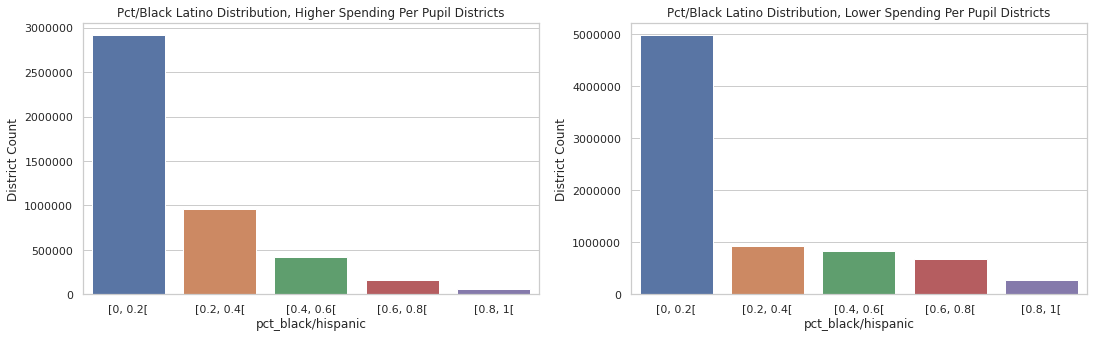

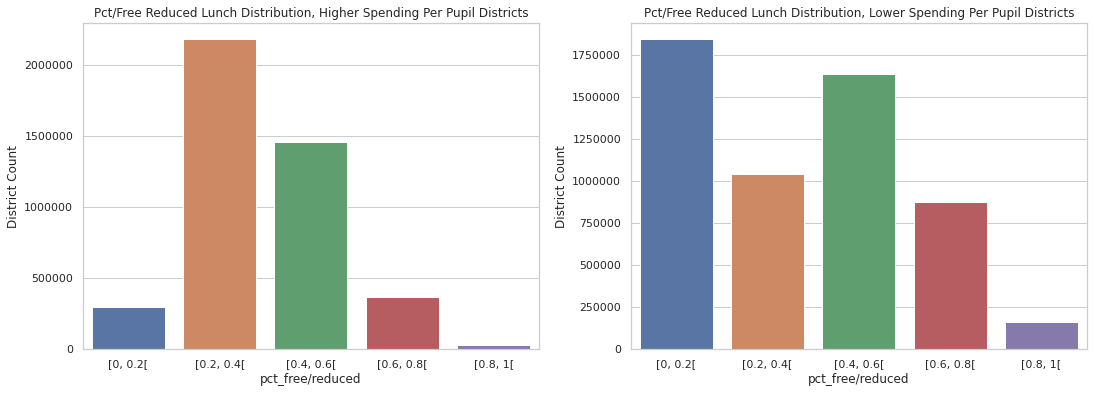

In [38]:
expendituregroup_race=districts_engagement_data[['pp_total_raw', 'pct_black/hispanic']]
expendituregroup_race.dropna(inplace=True)
expendituregroup_race['expenditure_group']=expendituregroup_race['pp_total_raw'].apply(lambda x: \
    classify_spending_group(x))
expendituregroup_race_high=filter_df(expendituregroup_race, 'expenditure_group',[1])
expendituregroup_race_low=filter_df(expendituregroup_race, 'expenditure_group',[1], 'not_equals')


#all_race=districts_engagement_data[['pct_black/hispanic']]
#all_race=filter_df(all_race, 'expenditure_group',[1], 'not_equals')
#all_race.dropna(inplace=True)


expendituregroup_race_high_counts=expendituregroup_race_high.groupby('pct_black/hispanic', as_index=False).size()
expendituregroup_race_low_counts=expendituregroup_race_low.groupby('pct_black/hispanic', as_index=False).size()
#all_race_counts=all_race.groupby('pct_black/hispanic', as_index=False).size()
#all_race_counts.columns=['pct_black/hispanic', 'District Count']
expendituregroup_race_high_counts.columns=['pct_black/hispanic', 'District Count']
expendituregroup_race_low_counts.columns=['pct_black/hispanic', 'District Count']



expendituregroup_class=districts_engagement_data[['pp_total_raw', 'pct_free/reduced']]
expendituregroup_class.dropna(inplace=True)
expendituregroup_class['expenditure_group']=expendituregroup_class['pp_total_raw'].apply(lambda x: \
    classify_spending_group(x))
expendituregroup_class_high=filter_df(expendituregroup_class, 'expenditure_group',[1])
expendituregroup_class_low=filter_df(expendituregroup_class, 'expenditure_group',[1], 'not_equals')

#all_class=districts_engagement_data[['pct_free/reduced']]
#all_class=filter_df(all_class, 'expenditure_group',[1], 'not_equals')
#all_class.dropna(inplace=True)

                  
expendituregroup_class_high_counts=expendituregroup_class_high.groupby('pct_free/reduced', as_index=False).size()
expendituregroup_class_low_counts=expendituregroup_class_low.groupby('pct_free/reduced', as_index=False).size()
expendituregroup_class_high_counts.columns=['pct_free/reduced', 'District Count']
expendituregroup_class_low_counts.columns=['pct_free/reduced', 'District Count']

fig, [ax1, ax2] = plt.subplots(1,2,figsize=(18,5))
ax1.set_title('Pct/Black Latino Distribution, Higher Spending Per Pupil Districts')
ax2.set_title('Pct/Black Latino Distribution, Lower Spending Per Pupil Districts')
bp1=sns.barplot(data=expendituregroup_race_high_counts,x="pct_black/hispanic", y="District Count", ax=ax1)
bp2=sns.barplot(data=expendituregroup_race_low_counts,x="pct_black/hispanic", y="District Count", ax=ax2)
bp1.ticklabel_format(style='plain', axis='y')
bp2.ticklabel_format(style='plain', axis='y')
plt.show()

fig, [ax3, ax4] = plt.subplots(1,2,figsize=(18,6))
bp3=sns.barplot(data=expendituregroup_class_high_counts,x="pct_free/reduced", y="District Count", ax=ax3)
bp4=sns.barplot(data=expendituregroup_class_low_counts,x="pct_free/reduced", y="District Count", ax=ax4)
bp3.ticklabel_format(style='plain', axis='y')
bp4.ticklabel_format(style='plain', axis='y')
ax3.set_title('Pct/Free Reduced Lunch Distribution, Higher Spending Per Pupil Districts')
ax4.set_title('Pct/Free Reduced Lunch Distribution, Lower Spending Per Pupil Districts')
plt.show()
del(expendituregroup_race)
del(expendituregroup_class)
del(expendituregroup_race_high)
del(expendituregroup_class_high)
del(expendituregroup_race_low)
del(expendituregroup_class_low)
del(expendituregroup_race_high_counts)
del(expendituregroup_race_low_counts)
del(expendituregroup_class_high_counts)
del(expendituregroup_class_low_counts)

gar=gc.collect()

<font size=+1>This data raises a question regarding whether the engagement gaps between ethnic and economic groups can be explained primarily by school district spending: if more funding were allocated to districts with high proportions of Black/Hispanic or economically disadvantaged students, would the gaps would disappear?</font>

<font size=+1>Below we examine what the LearnPlatform data suggest about this question by comparing the 0-40% and 40-80% districts for both pct black/hispanic and pct free/reduced for all three expenditure groups.</font>

<font size=+1>We see that there may be an interaction between spending per pupil and engagement. In the 2 highest spending groups, the groups more vulnerable to an engagement gap showed significantly lower engagement in three of four cases. This was true for both comparisons of pct/black hispanic, and 1 of 2 comparisons for free/reduced. These results lend support to the idea that higher spending per-pupil by itself won't resolve engagement gaps. Joachim, Hassel, & Clifford (2020) agree--they note that increased funding in and of itself is not sufficient to ensure that remote learning will be effective. </font>

<font size=+1>In the lowest spending group, the more vulnerable groups showed higher engagement. This does not suggest that less spending is the solution to the engagement gap for these groups, since overall engagement is lowest in that group. Maybe this means it is worth comparing wealthier districts to less-wealthy districts in terms of how they engage students of color and less well-off students? Gross and Opalka (2020) note that more impoverished districts are taking creative steps to improve connectivity, such as purchasing cellular data for students who have phones or tablets and setting up hotspots and outdoor work areas on school grounds. Perhaps such steps are having a positive effect for students who might otherwise be  more severely impacted? 
 </font>
 


In [39]:
ts=[]
ps=[]
mean_group1=[]
mean_group2=[]
expenditure_groups=[1,2,3]

expend_race=districts_engagement_data[['pp_total_raw', 'pct_black/hispanic', 'engagement_index']]
expend_race.dropna(inplace=True)
expend_race['expenditure_group']=expend_race['pp_total_raw'].apply(lambda x: \
    classify_spending_group(x))
expend_race=filter_df(expend_race, 'pct_black/hispanic', ['[0.8, 1['], 'not_equals')
expend_race['pct_black/hispanic group']=np.where(expend_race['pct_black/hispanic'] \
    .isin(['[0, 0.2[','[0.2, 0.4[']), '0-40% Black/Hispanic', '40-80% Black Hispanic' )

expend_class=districts_engagement_data[['pp_total_raw', 'pct_free/reduced', 'engagement_index']]
expend_class.dropna(inplace=True)
expend_class=filter_df(expend_class, 'pct_free/reduced', ['[0.8, 1['], 'not_equals')
expend_class['expenditure_group']=expend_class['pp_total_raw'].apply(lambda x: \
    classify_spending_group(x))
expend_class['pct_free/reduced group']=np.where(expend_class['pct_free/reduced'] \
    .isin(['[0, 0.2[','[0.2, 0.4[']), '0-40% Free/Reduced', '40-80% Free/Reduced' )


for eg in expenditure_groups:
    df_expend_race=filter_df(expend_race, 'expenditure_group',[eg])
    df_expend_class=filter_df(expend_class, 'expenditure_group',[eg])

    race_040=filter_df(df_expend_race, 'pct_black/hispanic group',['0-40% Black/Hispanic'])
    race_4080=filter_df(df_expend_race, 'pct_black/hispanic group',['40-80% Black Hispanic'])
    class_040=filter_df(df_expend_class, 'pct_free/reduced group',['0-40% Free/Reduced'])
    class_4080=filter_df(df_expend_class, 'pct_free/reduced group',['40-80% Free/Reduced'])
    mean_group1.append(np.mean(race_040['engagement_index']))
    mean_group2.append(np.mean(race_4080['engagement_index']))
    mean_group1.append(np.mean(class_040['engagement_index']))
    mean_group2.append(np.mean(class_4080['engagement_index']))

    t_test=scipy.stats.ttest_ind(race_040['engagement_index'], \
              race_4080['engagement_index'], alternative='greater')
    ts.append(t_test[0])
    ps.append("{:.6f}".format(t_test[1]) + "*" if t_test[1]<=.05 else t_test[1])


    t_test=scipy.stats.ttest_ind(class_040['engagement_index'], \
              class_4080['engagement_index'], alternative='greater')
    ts.append(t_test[0])
    ps.append("{:.6f}".format(t_test[1]) + "*" if t_test[1]<=.05 else t_test[1])

df=pd.DataFrame({
    'Expenditure Group': [1,1,2,2,3,3],
    'Group 1':['0-40% Pct/Black Hispanic Mean Engagment', '0-40% Pct/Free Reduced'] * 3,
                'Group 1 mean': mean_group1,
                'Group 2':['40-80% Pct/Black Hispanic Mean Engagment', '40-80% Pct/Free Reduced'] * 3,
                'Group 2 mean': mean_group2,
                't': ts,
                'p': ps})
df_as_html(df)

del(expend_race)
del(expend_class)
del(df_expend_class)
del(race_040)
del(race_4080)
del(class_040)
del(class_4080)
del(df)
gar=gc.collect()

Expenditure Group,Group 1,Group 1 mean,Group 2,Group 2 mean,t,p
1,0-40% Pct/Black Hispanic Mean Engagment,120.202488,40-80% Pct/Black Hispanic Mean Engagment,82.815166,20.272613,0.000000*
1,0-40% Pct/Free Reduced,102.727386,40-80% Pct/Free Reduced,134.819892,-24.754048,1.0
2,0-40% Pct/Black Hispanic Mean Engagment,176.365249,40-80% Pct/Black Hispanic Mean Engagment,105.318191,38.135000,0.000000*
2,0-40% Pct/Free Reduced,174.003827,40-80% Pct/Free Reduced,113.754500,34.639627,0.000000*
3,0-40% Pct/Black Hispanic Mean Engagment,240.264100,40-80% Pct/Black Hispanic Mean Engagment,1289.550087,-54.403210,1.0
3,0-40% Pct/Free Reduced,295.130775,40-80% Pct/Free Reduced,527.520995,-16.442986,1.0


# IV.	 What state practices, policies, and interventions are associated with changes in student engagement?

<font size=+1>In the final section of the report we will review digital engagement, on a state by state basis, and attempt to identify which state interventions might increase engagement overall and decrease the digital education gaps that adversely impact students of color and economically disadvantaged students.</font>

<font size=+1>We will rank states on the LearnPlatform Engagement Index and Percent Access metrics and use these rankings to identify states on which to zero in. We'll review the policies and practices of selected states in order to identify potential best and worst practices.</font>

<font size=+1>Since the pandemic provided a real-life laboratory to study digital education in an environment where its importance was greatly magnified, we will focus on engagement in the pandemic specifically. Digital engagement pre- and post-pandemic is  obviously important, as noted in the Introduction's discussion of the "homework gap", but we want to prevent the scope of this review from becoming overly broad.</font>




**A. Which States Did and Did Not Improve Over Time**

<b>Selecting States and  Dates For Analysis:</b>


<font size=+1>As discussed earlier, for the year 2020 the weeks of 04/6, 4/20, and 4/27 (referred to below as <b>"early pandemic"</b>) show the most online activity in the period after widespread school closures began for school year 2019-2020; and the weeks of 09/14, 09/21, and 09/28 2020 (referred to as <b>"mid pandemic"</b>) show the most online activity for the school year 2020-2021.</font>

<font size=+1>We will use data from these dates only to analyze digital engagement at the state level. We are assuming that these are the times when engagement would be most influenced by local and state policies and interventions, as opposed to extraneous factors such as contemporaneous or upcoming school vacations</font>.

<font size=+1>As mentioned earlier, in state based analyses, we exclude Arizona and North Dakota, due to inadequate sample size or apparent sampling bias.  In addition, to assess engagement over time on a state level, we will include only states with at least one observation in each of the six weeks chosen for the time series.</font>  

<font size=+1>Based on the below, which displays the states without data available for all six weeks, Minnesota and Texas will also be excluded from the analysis.</font>



In [40]:
week_of_list_early=['2020-04-06', '2020-04-20', '2020-04-27']
week_of_list_mid=['2020-09-21', '2020-09-28', '2020-10-05'] 
week_of_list_both=week_of_list_early+ week_of_list_mid
state_data=districts_engagement_data[['pct_access', 'engagement_index', 'weekof', 'state']]
state_data.dropna(inplace=True)
state_data=filter_df(state_data, 'weekof', week_of_list_both, 'equals')
state_data=state_data[['state', 'weekof']]
state_data.drop_duplicates(inplace=True)
state_data_vc=pd.DataFrame(state_data.state.value_counts().reset_index())
state_data_vc['week count'] = state_data_vc['state']
state_data_vc['state'] = state_data_vc['index']
state_data_vc=state_data_vc[['state', 'week count']].reset_index(drop=True)
state_data_vc=filter_df(state_data_vc, 'week count', [6], 'not_equals')

display(HTML('<center><h3>States without data for all 6 weeks of interest<h3></center>'))
df_as_html(state_data_vc)

gar=gc.collect()


state,week count
Texas,3
Minnesota,3


**Top/Bottom States Overall**

<font size=+1>Overall, New York and New Hampshire score best on both measures of engagement in both periods of the pandemic.  Florida,  Tennessee, and North Carolina can be considered the lowest scoring states; they are the only states with at least one bottom two ranking on either measure at either of the two defined time periods. </font>

In [41]:
state_list=list(districts_engagement_data.state.unique())
state_list.remove('Minnesota')
state_list.remove('Texas')
state_list.remove('Arizona')
state_list=[item for item in state_list if not(pd.isnull(item)) == True]
#df=compare_before_mid_pandemic(filter_on_field=['state'],filter_on_values=state_list)



In [42]:
df_before, df_after = compare_before_mid_pandemic(filter_on_field=['state'],filter_on_values=state_list)
df_before=df_before.groupby('state', as_index=False)['engagement_index'].mean()
df_after = df_after.groupby('state', as_index=False)['engagement_index'].mean()
df_combined=pd.merge(df_before, df_after, on='state')
df_combined.columns=['state', 'eng_early', 'eng_mid']
df_combined['eng_rank_early']=df_combined['eng_early'].rank(ascending=False).astype(int)
df_combined['eng_rank_mid']=df_combined['eng_mid'].rank(ascending=False).astype(int)

In [43]:
df_before, df_after=compare_before_mid_pandemic(filter_on_field=['state'],filter_on_values=state_list, measure='pct_access')
df_before=df_before.groupby('state', as_index=False)['pct_access'].mean()
df_after = df_after.groupby('state', as_index=False)['pct_access'].mean()
df_combined_pa=pd.merge(df_before, df_after, on='state')
df_combined_pa.columns=['state', 'pa_early', 'pa_mid']
df_combined_pa['pa_rank_early']=df_combined_pa['pa_early'].rank(ascending=False).astype(int)
df_combined_pa['pa_rank_mid']=df_combined_pa['pa_mid'].rank(ascending=False).astype(int)
df_combined=pd.merge(df_combined,df_combined_pa, on='state' )
del(df_before)
del(df_after)

gar=gc.collect()

In [44]:
df_combined.sort_values('eng_early', ascending=False, inplace=True)
df_as_html(df_combined)

state,eng_early,eng_mid,eng_rank_early,eng_rank_mid,pa_early,pa_mid,pa_rank_early,pa_rank_mid
New York,750.122496,651.477998,1,1,1.618746,1.728855,1,1
New Hampshire,415.145587,409.804931,2,2,1.228570,1.443327,2,2
Connecticut,349.398198,324.574984,3,4,0.820645,0.866787,4,5
Wisconsin,326.158594,305.319437,4,5,0.941407,0.912497,3,4
Illinois,246.810014,269.402910,5,6,0.646498,0.762391,5,8
Massachusetts,224.568313,326.161927,6,3,0.499488,0.824276,9,7
Ohio,190.742654,200.049830,7,8,0.622109,0.658167,6,9
Indiana,190.284037,264.661116,8,7,0.539876,0.865269,8,6
New Jersey,186.463664,165.886628,9,10,0.463161,0.556973,10,10
District Of Columbia,151.371310,199.727248,10,9,0.581204,1.129134,7,3


<font size=+1>In this review of state policies and interventions, we are going to focus more on changes in engagement from early to mid-pandemic within states than rankings across states.</font>

<font size=+1>With some exceptions,  states in the top half of the rankings in the early pandemic maintain their ranking mid-pandemic, but do not show much change in scores. Perhaps they were more prepared for the transition to remote learning than other states and already had policies in place to lessen its impact. </font>

<font size=+1>By contrast, states in the bottom half show more variability in how they ranked and/or how much their scores changed. For instance, North Carolina and District of Columbia show relatively large changes in scores, with Michigan also moving up in rank. On the other hand, Florida's rank decreases on both measures and shows a negligible increase on engagement index and a decrease on percent access. </font>

<font size=+1>We believe that focusing on states such as North Carolina and Florida, which seemingly required a fair amount of improvement to catch up on digital education due to the pandemic, will provide insight into which policies and interventions are most or least effective in facilitating this goal.</font>

**Percentage Change from Early to Mid-Pandemic**

<font size=+1>The below adds percentage change scores for the states on both measures and re-orders the list based on percentage change in mean engagement index.</font>


In [45]:
df_combined['eng_%change']=((df_combined['eng_mid'] - \
df_combined['eng_early']) / df_combined['eng_early']) * 100
df_combined['pa_%change']=((df_combined['pa_mid'] - \
df_combined['pa_early']) / df_combined['pa_early']) * 100


In [46]:
df_combined.sort_values('eng_%change', ascending=False, inplace=True)
df_as_html(df_combined)

state,eng_early,eng_mid,eng_rank_early,eng_rank_mid,pa_early,pa_mid,pa_rank_early,pa_rank_mid,eng_%change,pa_%change
Tennessee,12.139132,104.148064,19,17,0.046394,0.432594,18,15,757.953121,832.435536
North Carolina,16.794655,99.833152,18,18,0.020816,0.226562,19,18,494.434078,988.413806
Michigan,29.156670,161.576082,17,11,0.088731,0.491606,17,11,454.165082,454.040226
Washington,72.261496,132.562604,16,15,0.264869,0.380050,15,17,83.448462,43.485766
Virginia,81.140476,142.059676,14,12,0.219821,0.455334,16,14,75.078682,107.138691
Massachusetts,224.568313,326.161927,6,3,0.499488,0.824276,9,7,45.239514,65.023999
Indiana,190.284037,264.661116,8,7,0.539876,0.865269,8,6,39.087398,60.272038
District Of Columbia,151.371310,199.727248,10,9,0.581204,1.129134,7,3,31.945247,94.274920
California,106.523881,138.091179,12,13,0.291077,0.477181,13,13,29.634011,63.936210
Missouri,100.363308,121.112964,13,16,0.343592,0.383563,12,16,20.674544,11.633446


<font size=+1>Among the states that ranked in the bottom half on engagement early-pandemic, Tennessee, North Carolina, Michigan, and Virginia show a high magnitude of change. These will be taken as exemplars of "model" states--we will review their policies and interventions to see if they provide insight into which interventions are effective. Florida, Utah, Missouri -- low ranked states on engagement in the early period -- showed far less improvement and/or a decrease on one measure.  They will be taken as negative examples, to see if they provide insight as to what not to do.</font>




<b>What were the policies of states that did and did not improve?</b>
    
<font size=+1>We review the reopening guidelines for all fifty states in the year 2020, as compiled by the Center for Reinventing Public Education (CRPE, 2020). Below are the three free response guidelines they collected, for the  seven states in question:</font>

In [47]:
df_state_response = pd.read_csv('../input/crpe-covid-state-response-database/2020 Covid State Response Database - Master.csv', index_col=None)
state_list_2=[item for item in state_list if not item == 'District Of Columbia']
df_states_to_compare=df_state_response[['Indicators','Florida','Missouri','Utah', 'Tennessee', 'North Carolina', 'Michigan', 'Virginia']]
df_as_html(df_states_to_compare.iloc[[0,24,25], :] )

Indicators,Florida,Missouri,Utah,Tennessee,North Carolina,Michigan,Virginia
What are the state's recommendation for reopening schools based on local public health conditions? (Free Response),"The Department of Education directed school districts to reopen with the full ""panopoly of services"" and state funding is contingent on doing so. No evidence that this requirement is tied to a phased reopening framework or key public health indicators.","The state provides recommendations around operational shifts to support school reopening, such as screening protocols, physical distancing, and use of masks. There are currently no statewide health mandates related to K-12 schools. Decisions to open along with methods of instruction used during the 20-21 school year are made by local school leaders and local boards of education.","Utah school districts and public charter schools were required to develop reopening plans, but these do not appear to be tied to any specific criteria on disease spread for reopening. The guidance says decisions about opening in the fall will be made by local system leaders and local public health officials, generally. Utah has a four-tiered set of restrictions, generally, on businesses depending on disease spread. All of its counties are currently in the lowest two levels of restrictions.",School districts appear to have authority to reopen or stay closed without approval from the state department of education. Reopening frameworks recommend some form of in-person learning even when there is community spread if the school system has taken appropriate prevention measures. Guidance from the state department of education indicates schools should consider closing for at least 14 days when confirmed caseloads among children or adults at schools are rising.,"Districts are directed to have three plans that reflect varying levels of social distancing, with Plan C providing remote-only learning. The state requires a variety of operational changes to support health and safety. The governor monitors public health data and makes recommendations about Plan A, B or C.","Six phases for reopening: Remote learning for phases 1-3, in-person permitted with stringent safety protocols for phase 4, in-person permitted with moderate safety protocols for phase 5, in-person permitted with minimal safety protocols for phase 6. Phases aligned to Michigan Safe Start Plan. Progress through phases depends on cmprehensive review of data on new cases, health care system capacity, and capacity for testing and contact tracing. School systems will retain the authority to close school buildings even if they have not been mandated to do so.","Guidance from the state this summer indicates that schools may offer limited in-person instruction when the state is in Phase 2 of its reopening plan, and full in-person instruction when the state is in Phase 3. Schools' ability to move to these phases themselves depends on where the state is and subject to approval from the state department of education. Although the state is in Phase 3, there appear to be new limits placed on some regions of the state and the threshold for moving between phases as a state is unclear."
"How, if at all, is the state addressing internet connectivity infrastructure challenges? (Free Response)","The State of Florida encourages districts to use CARES funding to purchase education technology. Ultimately, it is up to the LEAs to determine what they will do with the funds. The state also maintains a list of low-cost internet providers.","The state conducted an internet connectivity survey, which revealed that 23% of students lacked sufficient internet access last Spring. The state deteremined the exact amount of connectivity devices needed to close student access gaps. It is not clear how the state will act on this information.",No information.,\n-$14million in wifi grants for 110k families,"The state allocated a portion of its federal stimulus funds ($12 million) directly to LEAs

<font size=+1> The responses seem to align to our identifications of model and problematic states. In regards to reopening schools, North Carolina, Tennessee, and Michigan provided specific guidance to districts, and in Virginia, districts cannot move to different phases in the reopening plan without approval from the state. North Carolina requires schools to have three specific plans "that reflect varying levels of social distancing", makes recommendations via the governor's office to the districts about the plans, and mandates "a variety of operational changes to support health and safety." Michigan defines six very specific phases for reopening, and allowed districts to close school buildings even if they were not required to. In Virginia, even when the state as a whole moved to a more liberal re-opening phase, some regions were required by the state to remain in the previous more stringent phase.</font>

<font size=+1>By contrast, in Missouri, decisions about reopening schools are left to local leaders and districts, with "no statewide health mandates related to K-12 schools." In Florida, the state directed schools to re-open, without tying that requirement to any public health indicators. In Utah, reopening plans, "do not appear to be tied to any specific criteria on disease spread for reopening."</font>

<font size=+1>In regards to addressing internet connectivity issues and students' need for devices, the problem states basically provide no help to districts. Florida "encouraged" districts to use federal assistance to address the problem but provided neither guidance nor requirements. Missouri took a survey on internet connectivity but apparently did nothing with the findings. Utah did not provide any information on the topic.</font>

<font size=+1>By contrast, three of the four model states, North Carolina, Virginia, Tennessee, provided specific targeted funding to improve the connectivity infrastructure and  purchase devices. In Virginia, the length and detail of the response suggests that the state responded to these issues thoughtfully and seriously--it hired consultants to address the "Internet for All” problem and indicated plans to work with local districts to disseminate these consultants' findings and recommendations. </font>

<font size=+1>In sum, among the states that more urgently needed to improve in digital education, states that provided specific guidance to local districts and provided targeted funding to address the need for devices and connectivity tended to show demonstrable progress. States that provided general guidance or were not transparent in regards to the steps they took showed less progress.</font>

<font size=+1>The below are selected responses to some of the non-free form questions, and they are also revealing:</font>

In [48]:
df_as_html(df_states_to_compare.iloc[[1,2,6,7,15,17,21],:]) 



Indicators,Florida,Missouri,Utah,Tennessee,North Carolina,Michigan,Virginia
Are the state's recommendations about school reopening tied to specific indicators or transparent benchmarks? (Yes/No),No,No,No,No,Yes,Yes,No
Does the state require or recommend multiple learning scenarios? (Require/Recommend/No),Recommend,Recommend,Recommend,Recommend,Require,Require,Require
Does the state require or recommend districts submit a 20-21 SY fall reopening plan? (Require/Recommend/No),Require,No,Require,Require,Require,Require,Require
Are district plans required or recommended to be publicly posted? (Require/Recommend/No),No,No,Require,Require,No,Require,Require
Does the state require or recommend that districts implement strategies for accelerating learning and/or addressing learning loss? (Require/Recommend/No),No,Recommend,No,Recommend,Recommend,No,Recommend
Is the state making new requirements or recommendations around grading for 20-21 SY? (Require/Recommend/No/No Information),No information,No information,No Information,Recommend,Recommend,No Information,Recommend
Does the state prescribe how districts assess learning loss? (Require/Recommend/No),No,No,No,Recommend,Recommend,No,Recommend


<font size=+1>The first four questions apply to school operations during the pandemic (reopening and multiple learning scenarios, i.e., remote, in-person, hybrid, schedules). Two of the other three apply to assessing or addressing learning loss, and the third addresses changes to grading requirements. In all seven cases, the three  model states tended towards more prescriptive and stringent requirements for local districts to take specific action and/or to provide transparency and accountability to the public about what they are doing. 

<font size=+1>Interestingly, around the important issue of learning loss, Missouri, like three of four of the model states, recommends that districts implement strategies to address the issue, but provides no guidance on how to assess its magnitude.  This is another example of what seems to be an important dividing line between effective and ineffective state policy--merely advising districts to "do something" vs. providing specific guidance and prescribing accountability around what exactly to do.</font>

<font size=+1>Joachim, A., Hassel, B., Clifford, B. (2020) reviewed the same CRPE database, looking at all 50 states, and their findings accord with the above. They write that without clear expectations, a system of support, and continued monitoring, "states lack information on how districts are responding to the crisis and make it difficult if not impossible to systematically respond to any gaps in access to remote learning that emerge across districts.” And they list "access to instruction in the face of building closures, action on the digital divide, and plans to address student learning loss" as examples "the issues that matter most for student learning." Similarly, our analysis suggests that oversight, specific action on device/connectivity gaps, provision of hybrid learning delivery models, and action to address learning loss are key factors in addressing the digital engagement gaps in the pandemic.</font>

**B. What Other State Characteristics are Correlated with Digital Education Engagement?**

<font size=+1>Below we will review state-level policy and health data and identify policies and health-related demographic characteristics that correlate highly with digital education engagement.  We aggregate data from three sources:</font>

<ul>
<li><font size=+1>COVID-19 US State Policy Database, or CUSP (Raifman, Nocka, et. al. 2020).</font>
<li><font size=+1>KFF State COVID-19 Data and Policy Actions Database (KFF, 2021)</font>
<li><font size=+1>Kids Count DataBook (Annie E. Casey Foundation 2020)</font>
</ul>

<font size=+1>Below, we report the correlations between many data points culled from these sources, and mean state engagement index and percent access scores.  We reviewed a number of other variables but below only report those correlations that reached or closely approached significance. In order to mitigate the risk of reporting spurious relationships, we only list variables that are highly correlated with both engagement measures.</font>

In [49]:
state_covid_data=pd.read_csv('../input/selected-data-from-covid-state-policy-database/Selected_State_Policy_Data.csv')
state_covidhealth_data=pd.read_csv('../input/kids-first-state-health-data/KidFirstCombinedData.csv')
state_childhoodtrends_data=pd.read_csv('../input/state-trends-in-childhood-well-being/StateTrendChildWellBeingData.csv')

#clean up where needed to match with LearnPlatform

state_covid_data['state']=np.where(state_covid_data['state']=='District of Columbia', \
                                   'District Of Columbia', state_covid_data['state'])
gar=gc.collect()

In [50]:
#combine all of the data.
state_combined_data = pd.merge(state_means_eng, state_means_pa, on='state')
state_combined_data =filter_df(state_combined_data, 'state', ['North Dakota', 'Arizona'], 'not_equals')
state_combined_data=pd.merge(state_combined_data,state_covid_data, on='state', how='left' )
state_combined_data=pd.merge(state_combined_data,state_covidhealth_data, on='state', how='left')
state_combined_data=pd.merge(state_combined_data,state_childhoodtrends_data, on='state', how='left')
#for the variables we are interested in there awremissing value, use the mean in that case:
state_combined_data['AdultsNotSeeingDrDueToCost'].fillna((state_combined_data['AdultsNotSeeingDrDueToCost'].mean()), inplace=True)

In [51]:
state_characteristics = {
    'banned_school_fm_mandate_2021':'School face mask mandate ban 2021', 
     'evic_initiation_ban_2020': 'Eviction initiation ban, 2020',
     'util_shutoff_moratorium_2020':  'Utility Shutoff Moratorium, 2020',
     'medicaid_expansion':'Medicaid Expansion State',
     'AdultFluVaxRateHighRisk': 'Flu Vaccination Rate, High Risk Adults',
     'AdultsNotSeeingDrDueToCost': 'Percent of Adults Who Don''t See Doctors Due to Cost',
     'ChildFluVaxRateAllChildren': 'Flu Vaccination Rate, All Children',
     'ChildFluVaxRate6Mos4Yr': 'Flu Vaccination Rate, Children Age 6 Months to Four Years',
     'ChildFluVaxRate5-12': 'Flu Vaccination Rate, Children Age 5-12',
     'ChildFluVaxRate13-17': 'Flu Vaccination Rate, Children Age 13-17',
     'Percent of children w/o health insurance': 'Children Without Health Insurance, Percent'
    }

data_source = {
    'banned_school_fm_mandate_2021':'CUSP', 
     'evic_initiation_ban_2020': 'CUSP',
     'util_shutoff_moratorium_2020':  'CUSP',
     'medicaid_expansion':'CUSP',
     'AdultFluVaxRateHighRisk': 'KFF',
     'AdultsNotSeeingDrDueToCost': 'KFF',
     'ChildFluVaxRateAllChildren': 'KFF',
     'ChildFluVaxRate6Mos4Yr': 'KFF',
     'ChildFluVaxRate5-12': 'KFF',
     'ChildFluVaxRate13-17': 'KFF',
     'Percent of children w/o health insurance':'KidsCount'
    }

corr_method = {
    'banned_school_fm_mandate_2021':'Point-Biserial', 
     'evic_initiation_ban_2020': 'Point-Biserial',
     'util_shutoff_moratorium_2020':  'Point-Biserial',
     'medicaid_expansion':'Point-Biserial',
     'AdultFluVaxRateHighRisk': 'Pearson r',
     'AdultsNotSeeingDrDueToCost': 'Pearson r',
     'ChildFluVaxRateAllChildren': 'Pearson r',
     'ChildFluVaxRate6Mos4Yr': 'Pearson r',
     'ChildFluVaxRate5-12': 'Pearson r',
     'ChildFluVaxRate13-17': 'Pearson r',
     'Percent of children w/o health insurance':'Pearson r'
    
    }

corrs_eng=[]
corrs_pa=[]
alphas_eng=[]
alphas_pa=[]
notes=[]

# Iterate over all key-value pairs of dictionary by index
for index, (key, value) in enumerate(state_characteristics.items()):
        method=corr_method[key]
        #there's only one missing data point. 
        if (method=='Point-Biserial'):
            r_eng=stats.pointbiserialr(state_combined_data[key], \
                 state_combined_data['mean_engagement_index'])
            r_pa=stats.pointbiserialr(state_combined_data[key], \
                 state_combined_data['mean_pct_access'])
        elif(method=='Pearson r'):
            r_eng=stats.pearsonr(state_combined_data[key], \
                 state_combined_data['mean_engagement_index'])
            r_pa=stats.pearsonr(state_combined_data[key], \
                 state_combined_data['mean_pct_access'])
        corrs_eng.append(r_eng[0])  
        corrs_pa.append(r_pa[0]) 
        alphas_eng.append(r_eng[1]/2)
        alphas_pa.append(r_pa[1]/2)
        notes.append(1 if method=='Point-Biserial' else 2 )

df_state_characteristics=pd.DataFrame({
    'State Policy/Characteristic': list(state_characteristics.values()),
    'Correlation (Mean Engagement)': corrs_eng,
    'Alpha (Mean Engagement)': alphas_eng,
    'Correlation (Mean Pct Access)': corrs_pa,
    'Alpha (Mean Pct Access)': alphas_pa,
    'Source': list(data_source.values()),
    'Notes': notes
})
df_as_html(df_state_characteristics)
display(HTML('Notes: <table<tr><td><sup>1</sup>Point-Biserial Correlation </td></tr> \
    <tr><td><sup>2</sup>Pearson r Correlation</td>\
    </tr></table>'))


State Policy/Characteristic,Correlation (Mean Engagement),Alpha (Mean Engagement),Correlation (Mean Pct Access),Alpha (Mean Pct Access),Source,Notes
School face mask mandate ban 2021,-0.395723,0.037892,-0.383429,0.043100,CUSP,1
"Eviction initiation ban, 2020",0.415510,0.030518,0.385429,0.042219,CUSP,1
"Utility Shutoff Moratorium, 2020",0.417724,0.029766,0.428259,0.026381,CUSP,1
Medicaid Expansion State,0.394279,0.038478,0.412822,0.031450,CUSP,1
"Flu Vaccination Rate, High Risk Adults",0.369208,0.049767,0.393020,0.038994,KFF,2
Percent of Adults Who Dont See Doctors Due to Cost,-0.511766,0.008858,-0.528995,0.006837,KFF,2
"Flu Vaccination Rate, All Children",0.478600,0.014089,0.499237,0.010610,KFF,2
"Flu Vaccination Rate, Children Age 6 Months to Four Years",0.367738,0.050497,0.397484,0.037186,KFF,2
"Flu Vaccination Rate, Children Age 5-12",0.454879,0.019140,0.464736,0.016893,KFF,2
"Flu Vaccination Rate, Children Age 13-17",0.477090,0.014375,0.516626,0.008245,KFF,2


1Point-Biserial Correlation
2Pearson r Correlation


<b>Discussion</b>

<font size=+1>According to Domina and Renzulli et. al. (2021), "because a better mood at home and in other nonschool environments  is  associated  with  greater  engagement...family  stressors,  such  as  worries  associated  with  job  security,  home  schooling,  and  health,  are  likely  to  complicate  traditional engagement levels." The above correlations are consistent with this observation; all of them except perhaps for the one relating to face mask mandates are directly related to health and economic security.

<font size=+1>Banning Eviction Initiation and Utility Shutoff in 2020 was positively correlated with engagement, as was being a state that accepted Medicaid Expansion--this does not seem surprising as being homeless, having no light or heat at home, or lacking medical insurance are not exactly situations conducive to focusing on school work. The pandemic resulted in widespread decreases in economic security, and these results suggest that state action to mitigate this crisis helped in numerous ways, as they were not directly intended to increase student focus on their remote learning.</font> 

<font size=+1>Two characteristics, Percent of Children Without Health Insurance and Percent of Adults Who Don't See Doctors Due to Cost, are negatively correlated with  engagement scores. These two variables are both measures of economic and health insecurity.</font> 

<font size=+1>Interestingly, five variables related to flu vaccinations correlate with engagement. On the one hand, flu vaccination rates could be a correlate of general health; on the other hand, flu vaccines generally do not have a high rate of efficacy in preventing flu.<sup>7</sup> In 2021, the controversy over the COVID vaccine demonstrated that attitudes towards vaccines are associated with a wide range of beliefs, behaviors, and outcomes. If these vaccination rates reflect attitudes more than physical health, their correlation with digital educational engagement scores could reflect a more complex phenomenon.</font>

<font size=+1>Overall these correlations suggest good health, access to healthcare, economic security, and living in a state with policies reflecting an ethic of care are important predictors of childhood educational engagement.</font> 

<font size=-1><sup>7</sup>The efficacy rate is 40-60% according to the CDC (2021)</font>


# V. Conclusion

<font size=+1>In this report, we reviewed data collected during the COVID-19 pandemic from the LearnPlatform Chrome extension measuring engagement in remote/digital education. We've acknowledged  that this data has numerous limitations; to mitigate this issue, we have combined most of our findings with corresponding research and expertise in the academic literature on educational engagement. None of our findings are conclusive but many of them suggest possible avenues for further study.</font>

<font size=+1>In accord with the literature, we identified student populations that on the average experienced in gaps in engagement, including those that lack adequate technology and connectivity at home, people of color, the economically disadvantaged, and those who attend underfunded schools. Others have identified additional populations subject to the same, including LGBTQ students and the disabled, who suffered due to pandemic-related disruptions in mental-health services and other support systems. (U.S. Department of Education, Office of Civil Rights, 2021).</font>

<font size=+1>However, the story was not always a simple one of advantaged groups thriving and vulnerable groups suffering. Some of the more interesting results we reported include:
<ul>
<li><font size=+1>Higher negative correlations with engagement scores for survey responses indicating that devices and connectivity are "sometimes available", compared to the response "never available."</font>
<li><font size=+1>In underfunded schools, we observed less evidence of a gap in engagement for people of color and the economically disadvantaged than in adequately funded schools.</font>
<li><font size=+1>The well-documented gap in engagement in rural vs. urban/suburban locales might be mediated by ethnicity/economic status, whereby wealthier Caucasians living in rural areas are not as affected.</font>
<li><font size=+1>Strong correlations between multiple measures of state flu vaccination rates and state levels of online educational engagement, which we speculated might be related to a mediating factor representing a more complex societal phenomenon.</font>
</ul>

<font size=+1>We found that engagement improved over time during the pandemic, for all groups studied but not necessarily to the same degree across all groups on all measures. This was not an experimental study, so we cannot assess the degree to which these changes had to do with interventions aimed at improving engagement vs. student adjustment occurring naturally over time. But, with support from the literature we reviewed, we assumed that specific state actions played a large role, and we used the data to help identify the most constructive actions. </font>
    
<font size=+1>We found support for previous findings that states must take specific actions, and oversee and monitor district intervention, as opposed to merely issuing recommendations and taking a laissez-faire approach. Our analysis also suggested that they must identify and focus specifically on the worst educational outcomes of the pandemic, such as learning loss.</font>
    
<font size=+1>The COVID-19 pandemic may have been the first widespread disruption forcing children around the world to transition to remote education, but it likely will not be the last. More pandemics, climate change, or another disaster we have not envisioned might lead to the same situation. Even barring such events, engagement in digital education will assume increasing importance over time as more homework and school assignments shift to  virtual platforms.</font>
    
<font size=+1>Therefore, in order to avoid exacerbating historical inequities in education (which contribute to historical inequities in housing, employment, and incarceration rates), state and local governments cannot blithely ignore this crisis; they should leverage data in order to learn and apply best practices. We hope reviews such as the present one can contribute to this goal.<font>

# VI. Bibliography

<font size=+1>Aguilar,Mariana; Sheldon, Kayla; Ahrens, Rachel; and Janowic, Phil (2020). <i>2020: State of 
Engagement Report.</i> https://f.hubspotusercontent40.net/hubfs/5258344/GoGuardian%20Files/GoGuardian_2020_State_of_Engagement_Report.pdf</font>

<font size=+1>Annie E. Casey Foundation (2020). <i>Kids Count DataBook: State Trends in Childhoold Well-Being.</i> Available at https://assets.aecf.org/m/resourcedoc/aecf-2020kidscountdatabook-2020.pdf.</font>

<font size=+1>Center for Disease Control (2021). <i>Vaccine Effectiveness: How Well Do Flu Vaccines Work?</i> https://www.cdc.gov/flu/vaccines-work/vaccineeffect.htm</font>

<font size=+1>The Center on Reinventing Public Education (CRPE) (2020). <i>State Guidance on School Reopenings Amid the Pandemic, State Database 2020.</i> https://www.crpe.org/current-research/state-responses-covid-19</font>

<font size=+1>Chandra S. Chang A. Day L. Fazlullah A. Liu J. McBride L. Mudalige T. Weiss D. (2020). <i>Closing the K–12 Digital Divide in the Age of Distance Learning.</i> San Francisco CA: Common Sense Media. Boston Massachusetts Boston Consulting Group.</font>

<font size=+1>Domina, T., Renzulli, L., Murray, B., Garza, A.N., and Perez, L (2021). <i>Remote or Removed: Predicting Successful Engagement with Online Learning during COVID-19.</i> Socius: Sociological Research for a Dynamic World. Volume 7: 1 –15 (Accessed at https://journals.sagepub.com/doi/pdf/10.1177/2378023120988200)</font>

<font size=+1>Dorn Emma, Hancock Brian, Sarakatsannis Jimmy, and Viruleg, Ellen (2020). <i>COVID-19 and Student Learning in the United States: The Hurt could Last a Lifetime.</i>  McKinsey and Company: https://www.mckinsey.com/industries/public-and-social-sector/our-insights/covid-19-and-student-learning-in-the-united-racs-the-hurt-could-last-a-lifetime</font>

<font size=+1>Gross, B., and Opalka A. (2020). <i>As Many School Districts Reopen Virtually, the Opportunity Gap Widens for Students Living in Poverty.</i> Center on Reinventing Public Education (CRPE): https://www.crpe.org/thelens/many-school-districts-reopen-virtually-opportunity-gap-widens-students-living-poverty</font>

<font size=+1>Joachim, A., Hassel, B., and Clifford, B. (2020). <i>States Must take Decisive Action to Avert the Coming Education Crisis.</i> Center on Reinventing Public Education (CRPE): https://www.crpe.org/thelens/racs-must-take-decisive-action-avert-coming-education-crisis</font>

<font size=+1>KFF (Kaiser Family Foundation) (2021). <i>State COVID-19 Data and Policy Actions.</i> Available at https://www.kff.org/coronavirus-covid-19/issue-brief/state-covid-19-data-and-policy-actions/</font>

<font size=+1>Lake, R., and Makori A (2020). <i>The Digital Divide Among Students During COVID-19: Who Has Access? Who Doesn’t?</i>  Center on Reinventing Public Education (CRPE): https://www.crpe.org/thelens/digital-divide-among-students-during-covid-19-who-has-access-who-doesnt</font>

<font size=+1>Raifman J, Nocka K, Jones D, Bor J, Lipson S, Jay J, and Chan P. (2020). <i>COVID-19 US state policy database.</i> Available at: www.tinyurl.com/statepolicies.</font>

<font size=+1>U.S. Department of Education, Office of Civil Rights (2021). <i>Education in a Pandemic: The Disparate Impacts of COVID-19 on America’s Students.</i> https://www2.ed.gov/about/offices/list/ocr/docs/20210608-impacts-of-covid19.pdf</font>

<font size=+1>United States Census Bureau (2020). <i>Household Pulse Survey: Measuring Social and Economic Impacts during the Coronavirus Pandemic.</i> Availabe at https://www.census.gov/programs-surveys/household-pulse-survey.html

****